<h1>Projet 4<br />
Anticipez les besoins en consommation des bâtiments</h1><br />

<h1>Notebook prédiction 2 - Consommation d'énergie du site (KBtu) </h1>

Dans ce notebook, nous allons étudier différents modèles de machine learning pour prédire la consommation d'énergie des batîments. Les modèles qui seront traités dans ce projet sont : 

- **Baseline** :  Regression linéaire avec le Linear Regressor
- **Modèles linéaires** : SVR, ElasticNet
- **Modèles non-linéaires** : Random Forest Regressor, XGBoost.

# Analyse sur les données
<font color="#8A2BE2"><h4>1. Lecture des données  </h4><a class="anchor" id="section_1"></a></font>

In [1]:
#Importation des librairies

import numpy as np
import pandas as pd

#Graphiques
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("crest", as_cmap=True)

#Avertissements
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lecture des données 
data=pd.read_csv("data_projet_4_preprocessing.csv")
data.describe().T

count          mean           std  \
OSEBuildingID                    1645.0  1.628705e+04  1.381043e+04   
DataYear                         1645.0  2.016000e+03  0.000000e+00   
CouncilDistrictCode              1645.0  4.355623e+00  2.191135e+00   
Latitude                         1645.0  4.761617e+01  4.832125e-02   
Longitude                        1645.0 -1.223330e+02  2.462783e-02   
NumberofBuildings                1645.0  1.101520e+00  1.162587e+00   
NumberofFloors                   1645.0  4.135562e+00  6.603784e+00   
PropertyGFATotal                 1645.0  1.132369e+05  1.925098e+05   
LargestPropertyUseTypeGFA        1645.0  9.303157e+04  1.580650e+05   
SecondLargestPropertyUseTypeGFA  1645.0  1.863977e+04  5.100737e+04   
ThirdLargestPropertyUseTypeGFA   1645.0  3.184249e+03  1.808559e+04   
ENERGYSTARScore                  1081.0  6.513321e+01  2.837032e+01   
SiteEnergyUse(kBtu)              1645.0  7.961033e+06  2.165547e+07   
TotalGHGEmissions                1645.0  1.801153e+02  7.066110e+02   
BuildingAge                      1645.0  5.382006e+01  3.259777e+01   
TotalUseTypeNumber               1645.0  1.900912e+00  1.226940e+00   
GFABuildingRate                  1645.0  9.387262e-01  1.399302e-01   
GFAParkingRate                   1645.0  6.127379e-02  1.399302e-01   
GFAPerBuilding                   1645.0  1.036054e+05  1.803305e+05   
GFAPerFloor                      1645.0  3.369196e+04  4.767565e+04   
harvesine_distance               1645.0  2.830180e+00  2.214995e+00   

                                         min           25%           50%  \
OSEBuildingID                        1.00000  5.800000e+02  2.114000e+04   
DataYear                          2016.00000  2.016000e+03  2.016000e+03   
CouncilDistrictCode                  1.00000  2.000000e+00  4.000000e+00   
Latitude                            47.49917  4.758528e+01  4.761244e+01   
Longitude                         -122.41182 -1.223433e+02 -1.223329e+02   
NumberofBuildings                    0.00000  1.000000e+00  1.000000e+00   
NumberofFloors                       0.00000  1.000000e+00  2.000000e+00   
PropertyGFATotal                 11285.00000  2.950800e+04  4.929900e+04   
LargestPropertyUseTypeGFA         5656.00000  2.564900e+04  4.400000e+04   
SecondLargestPropertyUseTypeGFA      0.00000  0.000000e+00  0.000000e+00   
ThirdLargestPropertyUseTypeGFA       0.00000  0.000000e+00  0.000000e+00   
ENERGYSTARScore                      1.00000  4.800000e+01  7.300000e+01   
SiteEnergyUse(kBtu)                  0.00000  1.253746e+06  2.582687e+06   
TotalGHGEmissions                    0.00000  2.064000e+01  4.998000e+01   
BuildingAge                          1.00000  2.700000e+01  5.000000e+01   
TotalUseTypeNumber                   1.00000  1.000000e+00  2.000000e+00   
GFABuildingRate                      0.10498  1.000000e+00  1.000000e+00   
GFAParkingRate                       0.00000  0.000000e+00  0.000000e+00   
GFAPerBuilding                       0.00000  2.754400e+04  4.586400e+04   
GFAPerFloor                          0.00000  1.308930e+04  2.263550e+04   
harvesine_distance                   0.02113  8.777153e-01  2.322656e+00   

                                          75%           max  
OSEBuildingID                    2.459900e+04  5.022600e+04  
DataYear                         2.016000e+03  2.016000e+03  
CouncilDistrictCode              7.000000e+00  7.000000e+00  
Latitude                         4.764976e+01  4.773387e+01  
Longitude                       -1.223218e+02 -1.222586e+02  
NumberofBuildings                1.000000e+00  2.700000e+01  
NumberofFloors                   4.000000e+00  9.900000e+01  
PropertyGFATotal                 1.051000e+05  2.200000e+06  
LargestPropertyUseTypeGFA        9.200000e+04  1.719643e+06  
SecondLargestPropertyUseTypeGFA  1.269700e+04  6.399310e+05  
ThirdLargestPropertyUseTypeGFA   0.000000e+00  4.597480e+05  
ENERGYSTARScore                  8.900000e+01  1.00000

Effectuons également une étude pour consernant la consommation énergétique des batîments pour noter les anomalies : 

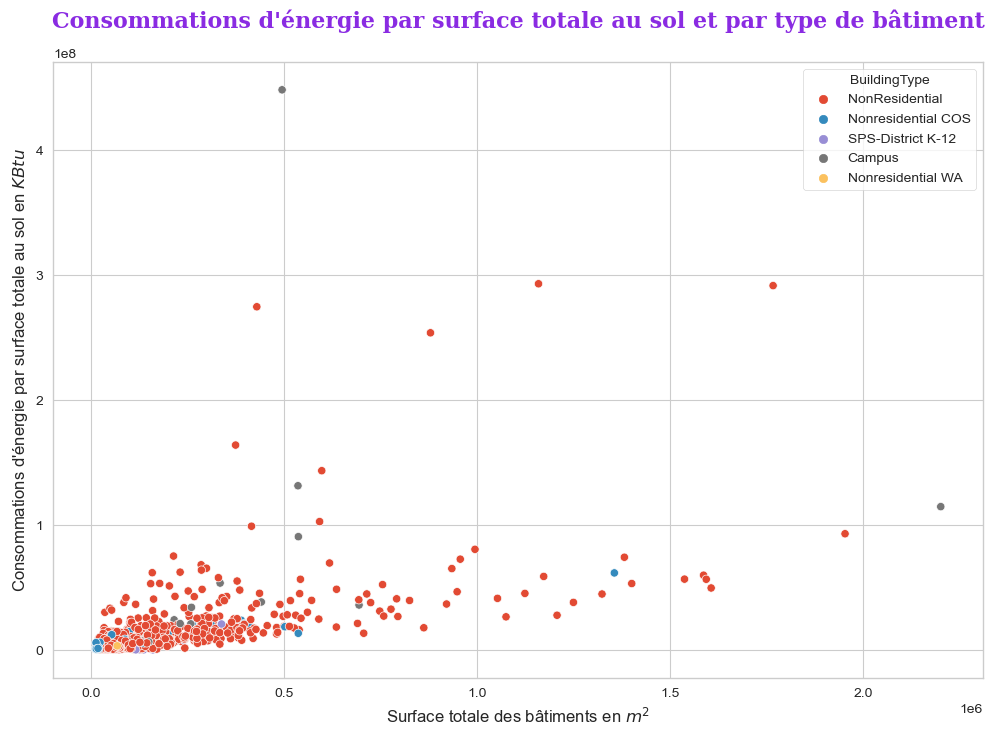

In [3]:
font_title = {'family': 'serif',
              'color':  '#8A2BE2',
              'weight': 'bold',
              'size': 20,
             }
#figure 2 consommation d'énergie
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Consommations d'énergie par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.xlabel('Surface totale des bâtiments en $m^2$')
plt.ylabel("Consommations d'énergie par surface totale au sol en $KBtu$")
plt.show()

Les données semblent cohérentes. 

In [4]:
df=data.copy()

Nous allons d'abord effectuer la modélisation sans le paramètre Energy Star Score :

In [5]:
energy_star_score=df['ENERGYSTARScore']

Supprimons également les paramètres d'identification qui nous seront pas utiles pour la modélisation : 

In [6]:
df=df.drop(["ENERGYSTARScore","YearsENERGYSTARCertified","TotalGHGEmissions"],axis=1)
unused_features = ['OSEBuildingID', 'PropertyName', 'Address', 'ZipCode','State','City','TaxParcelIdentificationNumber','DataYear','CouncilDistrictCode','Latitude', 'Longitude', 'TotalUseTypeNumber','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']
df_unused = df[unused_features]
df.drop(unused_features, axis=1, inplace = True)

Pour faciliter le traitement des colonnes, on va supprimer la nomination des parenthèses dans le nom des colonnes : 

In [7]:
df.columns = df.columns.str.strip().str.replace('(', '').str.replace(')', '')

In [8]:
df.describe().T

count          mean           std  \
NumberofBuildings                1645.0  1.101520e+00  1.162587e+00   
NumberofFloors                   1645.0  4.135562e+00  6.603784e+00   
PropertyGFATotal                 1645.0  1.132369e+05  1.925098e+05   
LargestPropertyUseTypeGFA        1645.0  9.303157e+04  1.580650e+05   
SecondLargestPropertyUseTypeGFA  1645.0  1.863977e+04  5.100737e+04   
ThirdLargestPropertyUseTypeGFA   1645.0  3.184249e+03  1.808559e+04   
SiteEnergyUsekBtu                1645.0  7.961033e+06  2.165547e+07   
BuildingAge                      1645.0  5.382006e+01  3.259777e+01   
GFABuildingRate                  1645.0  9.387262e-01  1.399302e-01   
GFAParkingRate                   1645.0  6.127379e-02  1.399302e-01   
GFAPerBuilding                   1645.0  1.036054e+05  1.803305e+05   
GFAPerFloor                      1645.0  3.369196e+04  4.767565e+04   
harvesine_distance               1645.0  2.830180e+00  2.214995e+00   

                                         min           25%           50%  \
NumberofBuildings                    0.00000  1.000000e+00  1.000000e+00   
NumberofFloors                       0.00000  1.000000e+00  2.000000e+00   
PropertyGFATotal                 11285.00000  2.950800e+04  4.929900e+04   
LargestPropertyUseTypeGFA         5656.00000  2.564900e+04  4.400000e+04   
SecondLargestPropertyUseTypeGFA      0.00000  0.000000e+00  0.000000e+00   
ThirdLargestPropertyUseTypeGFA       0.00000  0.000000e+00  0.000000e+00   
SiteEnergyUsekBtu                    0.00000  1.253746e+06  2.582687e+06   
BuildingAge                          1.00000  2.700000e+01  5.000000e+01   
GFABuildingRate                      0.10498  1.000000e+00  1.000000e+00   
GFAParkingRate                       0.00000  0.000000e+00  0.000000e+00   
GFAPerBuilding                       0.00000  2.754400e+04  4.586400e+04   
GFAPerFloor                          0.00000  1.308930e+04  2.263550e+04   
harvesine_distance                   0.02113  8.777153e-01  2.322656e+00   

                                          75%           max  
NumberofBuildings                1.000000e+00  2.700000e+01  
NumberofFloors                   4.000000e+00  9.900000e+01  
PropertyGFATotal                 1.051000e+05  2.200000e+06  
LargestPropertyUseTypeGFA        9.200000e+04  1.719643e+06  
SecondLargestPropertyUseTypeGFA  1.269700e+04  6.399310e+05  
ThirdLargestPropertyUseTypeGFA   0.000000e+00  4.597480e+05  
SiteEnergyUsekBtu                6.917478e+06  4.483853e+08  
BuildingAge                      8.600000e+01  1.160000e+02  
GFABuildingRate                  1.000000e+00  1.000000e+00  
GFAParkingRate                   0.000000e+00  8.950200e-01  
GFAPerBuilding                   9.802400e+04  2.200000e+06  
GFAPerFloor                      3.774000e+04  1.100000e+06  
harvesine_distance               4.257219e+00  8.843544e+00


<font color="#8A2BE2"><h4>3. Étude des paramètres en fonction de l'émission des GHG  </h4><a class="anchor" id="section_3"></a></font>

<font color="#8A2BE2"><h1>2. Analyse des données GHG  </h1><a class="anchor" id="section_2"></a></font>

##  2.1. Heatmap des corrélations

<AxesSubplot:>

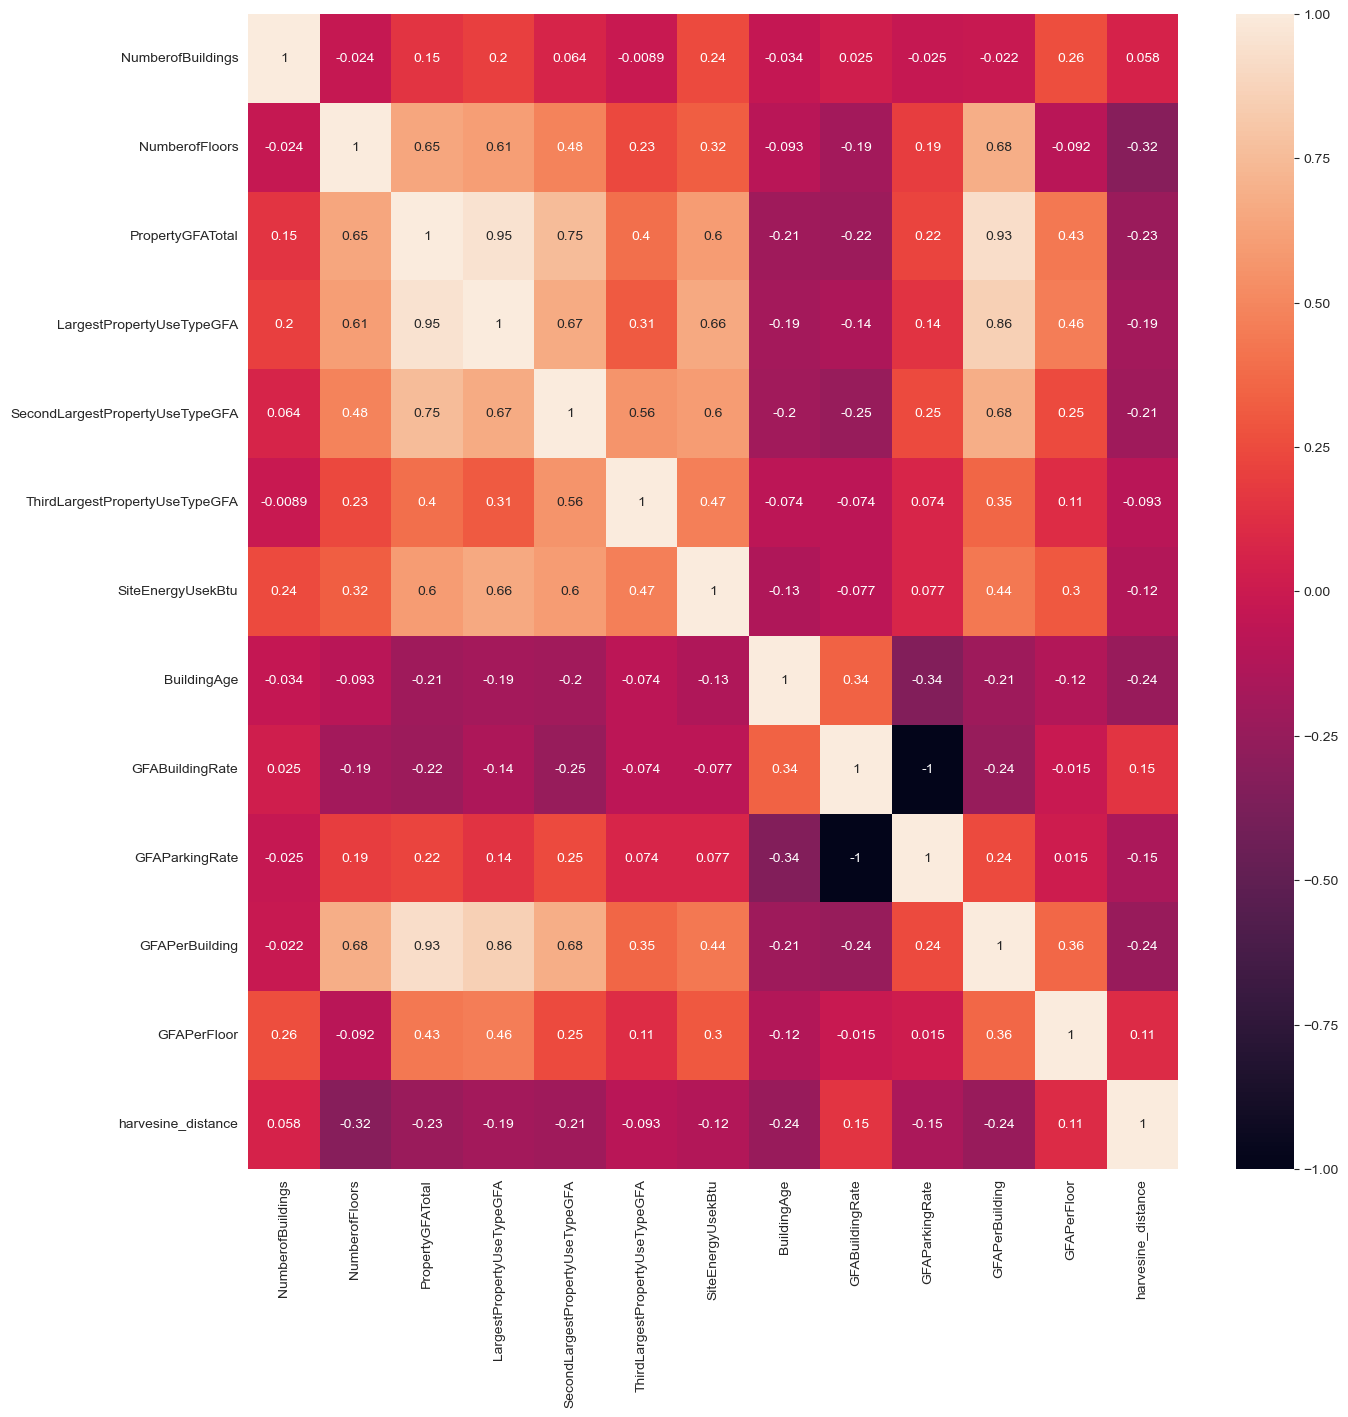

In [10]:
corr = df.corr()

#specify size of heatmap
fig, ax = plt.subplots(figsize=(15, 15))

#create seaborn heatmap
sns.heatmap(corr,annot=True)

On remarque que la consommation d'énergie des bâtiments est faiblement ou moyennement corrélée avec les autres variables. La variable qui à priori influera le plus sur la consommation est sont le LargestPropertyType et les variables de surface de parking et de bâtiments. 

## 2.2. Étude des Features Catégorielles

In [11]:
numerical_features = df.select_dtypes(include=['int64','float64'])
categorical_features = df.select_dtypes(exclude=['int64','float64']) 

In [12]:
categorical_features.nunique()

BuildingType               5
PrimaryPropertyType       22
Neighborhood              13
LargestPropertyUseType    56
dtype: int64

In [13]:
#Fonction permettant de visualliser la consommation d'énergie selon les différentes catégories 

def visualisation(variable,df):
    the_mean=df["SiteEnergyUsekBtu"].mean()
    fig=plt.figure(figsize=[18,7])
    fig.patch.set_facecolor('#E0E0E0')
    fig.patch.set_alpha(0.7)
    plt.title("Distribution des SiteEnergyUse(kBtu) par {}".format(variable),size=16)
    sns.boxplot(x=variable, y="SiteEnergyUsekBtu", data=df,color="#cbd1db",width=0.5,showfliers=False,showmeans=True)
    plt.hlines(y=the_mean,xmin=-0.5,xmax=len(df[variable].unique())-0.5,color="#6d788b",ls="--",label="Global mean")

    plt.ylabel("Consommation d'énergie en kBtu",size=14)
    plt.xticks(range(0,len(df[variable].unique()))
               ,df[variable].unique(),rotation=90)
    plt.legend()
    plt.grid()
    plt.show()

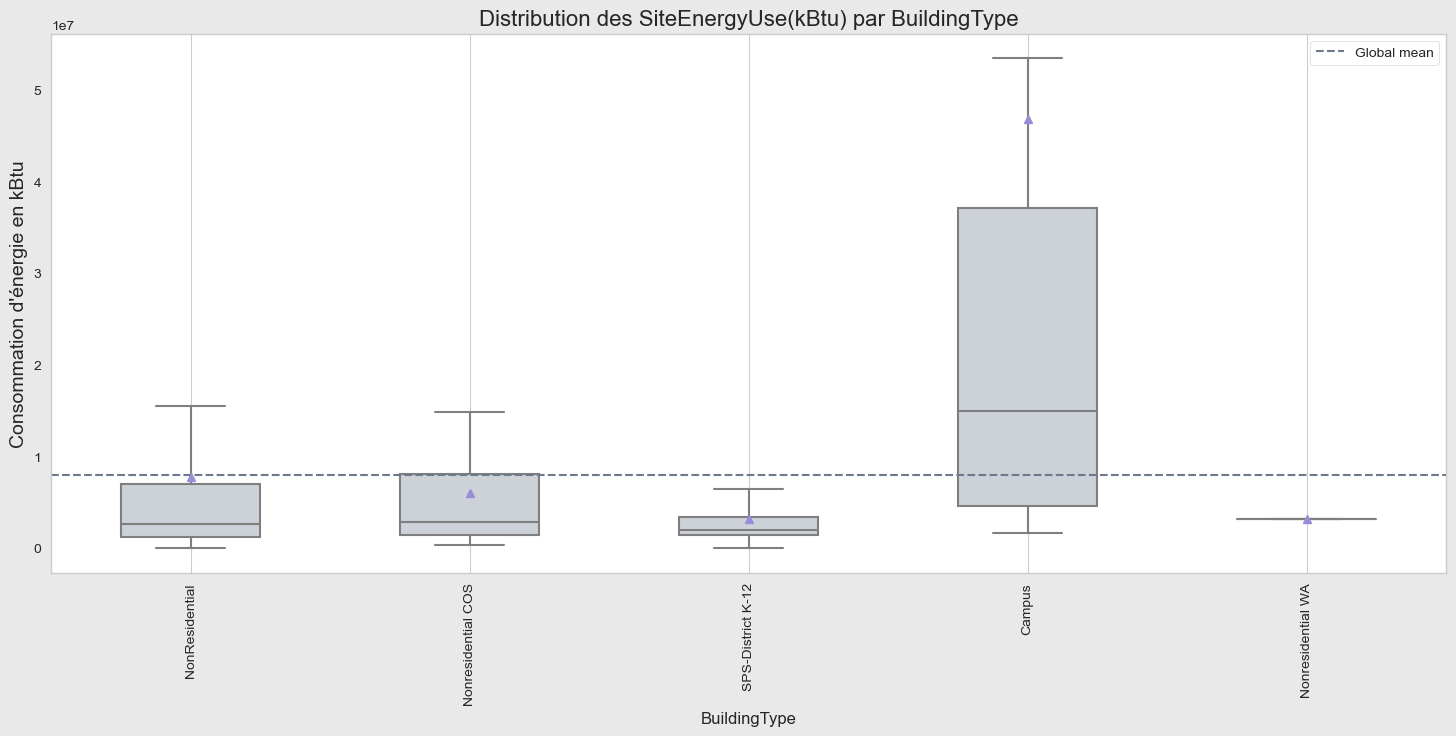

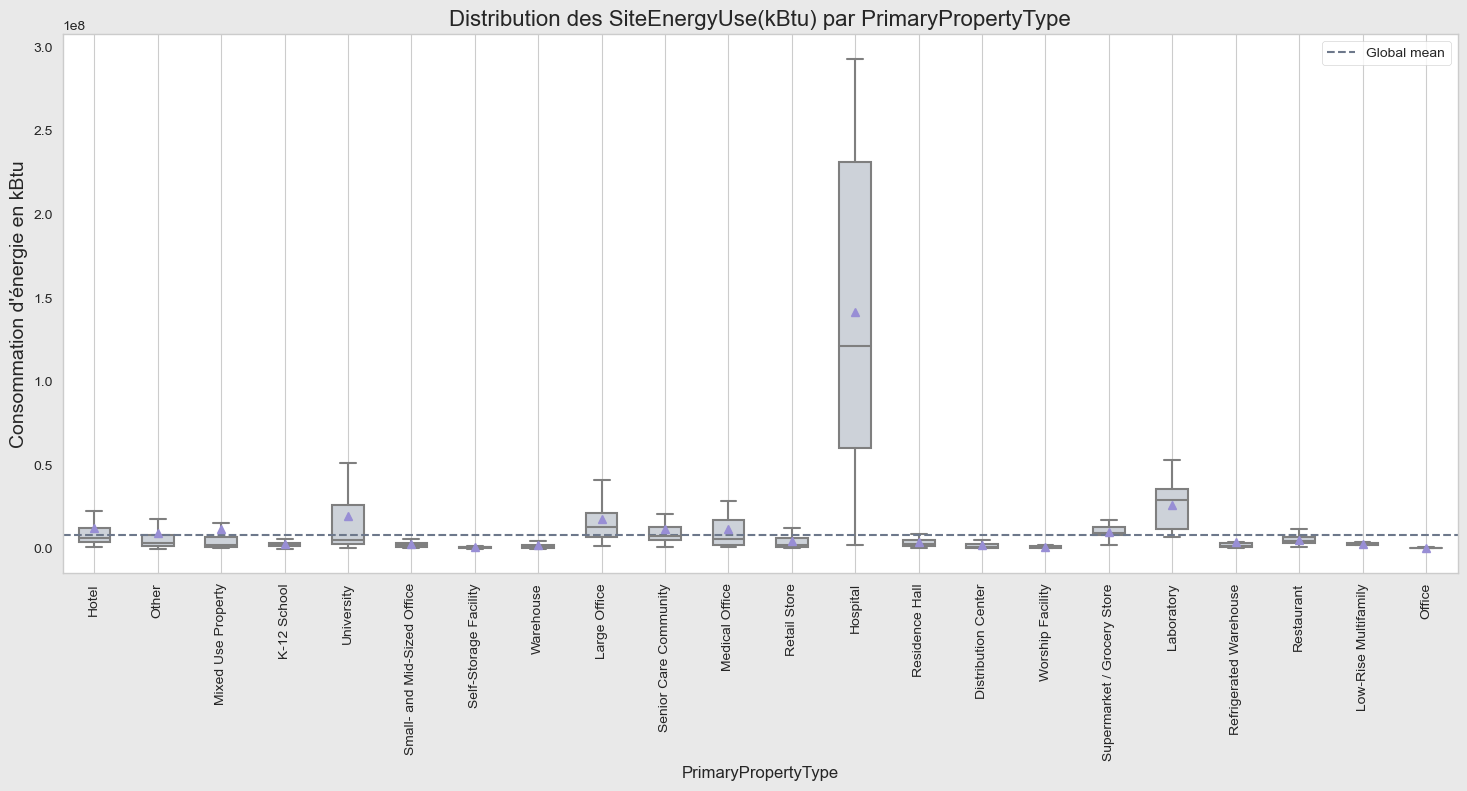

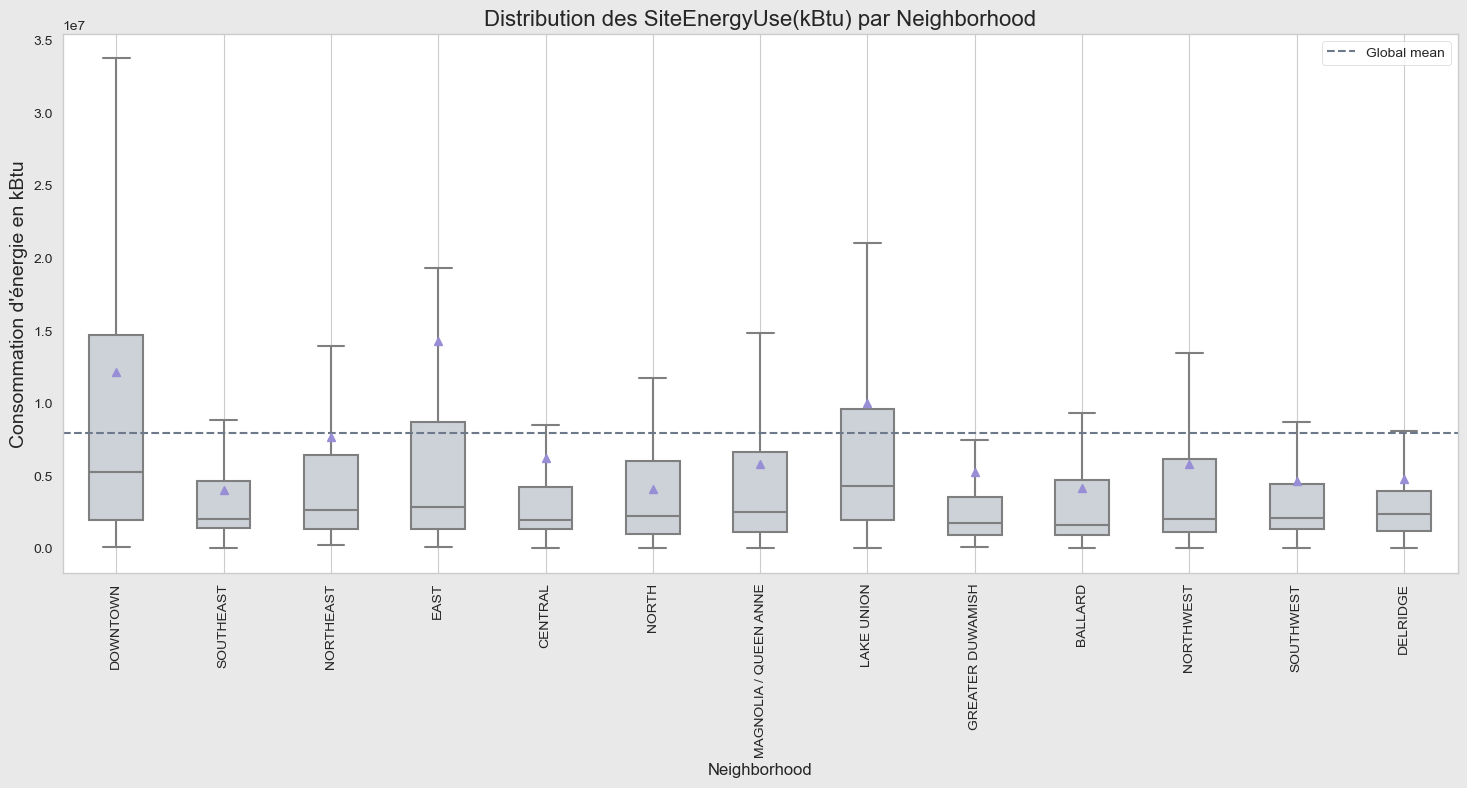

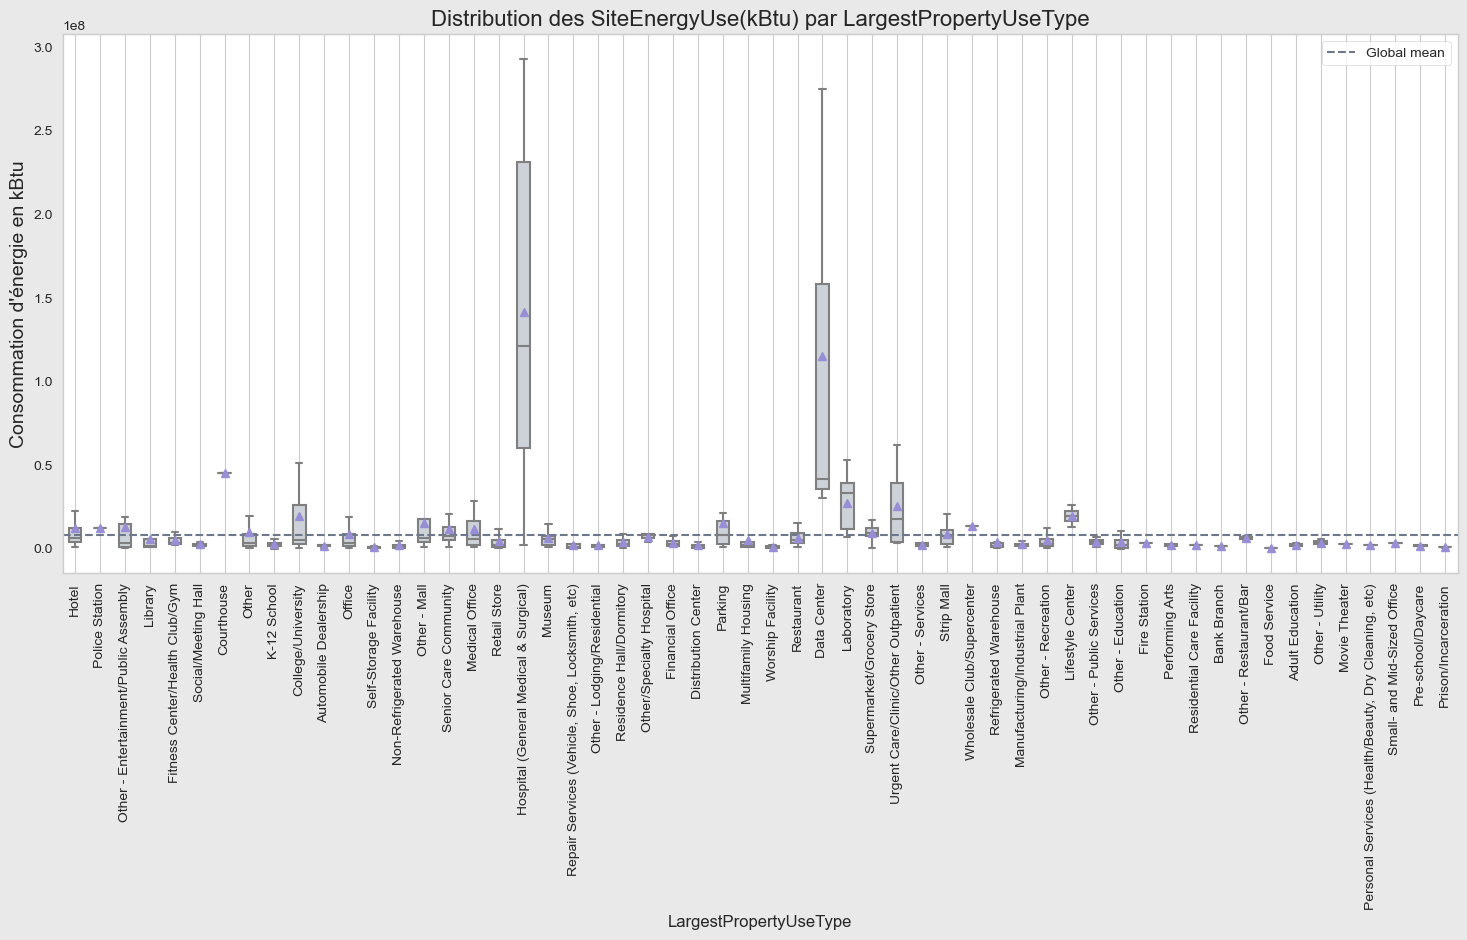

In [14]:
for v in categorical_features:
    visualisation(v,df)

#### Observations : 
- BuildingType : Les campus consomment beaucoup plus d'énergie que les autres types de bâtiments non résidentiels.
- Primary Property Type : Forte consommation pour les hopitaux , puis les autres types de buildings.
- Largest property type : Hopitaux, Courthouse et Data Centre sont très consommateurs. 
- Pas trop de distinction selon le type de Neighborhood. 

# Modélisation
<font color="#8A2BE2"><h1>1. Preprocessing  </h1><a class="anchor" id="section_2_1"></a></font>


## Encodage

Afin du modéliser, il est essentiel de numériser les données catégorielles. Nous allons d'abord effectuer l'encodage comme pour l'étude menée sur la variable cible TotalGHGEmissions. 

### Préparation One-Hot Encoding

Nous avons fait la remarque ci-dessus que les batîments du type Campus (dans BuildingType)ont une consommation beaucoup plus élevée que les autres types de batîments non résidentiels. On va séparer BuildingType en 2 catégories : 

In [15]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [16]:
df['BuildingType'] = df['BuildingType'].replace(['NonResidential', 'Nonresidential COS','SPS-District K-12','Nonresidential WA' ], 'OtherNonResidential')

In [17]:
df['BuildingType'].unique()

array(['OtherNonResidential', 'Campus'], dtype=object)

In [18]:
df.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'SiteEnergyUsekBtu', 'BuildingAge', 'GFABuildingRate', 'GFAParkingRate',
       'GFAPerBuilding', 'GFAPerFloor', 'harvesine_distance'],
      dtype='object')

### Préparation Ordinal Encoding 

Nous choissisons d'effectuer un ordinal encoding pour PrimaryPropertyType et LargestPropertyUseType, en catégorisant les batîments comme étant soit des batîments ayant une consommation élevée d'énergie, soit moyenne, soit  basse. 

Pour ce faire, il faudra, créer ces catégories grâce à une fonction qui attribuera automatiquement les batîments dans l'une de ces catégories. Bien évidemment, dans le futur, des nouveaux types de batîments peuvent être introduits. On effectue donc l'hypothèse que les prochaines données seront préablement catégorisées selon ces 3 types. On devra également mettre à jour la moyenne utilisée au fur et à mesure qu'on obtiendra de nouvelles données. 

In [19]:
#Cette fonction affichera "True" si la valeur moyenne comprise dans la catégorie > x fois que la moyenne générale

def x_times_more(x,val1,global_mean):
    if val1 > x*global_mean:
        return True
    else:
        return False
#Cette fonction affichera "True" si la valeur moyenne comprise dans la catégorie < x fois que la moyenne générale
   
def x_times_less(x,val1,global_mean):
    if val1 < x*global_mean:
        return True
    else:
        return False 

In [20]:
# Cette fonction affichera la liste des catégories avec une émission élevée ou basse des émissions de CO2 avec une valeur seuil (threshold - proportion of global average)
def large_consumption_track(variable, df,tresholdmax,tresholdmin):
    the_mean=df["SiteEnergyUsekBtu"].mean()
    cat=df[variable].unique()
    high_cat=[]
    low_cat=[]
    middle_cat=[]
    for c in cat:
        x=df.loc[df[variable]==c]
        m=x["SiteEnergyUsekBtu"].mean()
        if x_times_more(tresholdmax,m,the_mean):
            high_cat.append(c)
        elif x_times_less(tresholdmin,m,the_mean):
            low_cat.append(c)
        else :
            middle_cat.append(c)
    return high_cat, middle_cat,low_cat

In [21]:
use_high,use_middle,use_low=large_consumption_track('LargestPropertyUseType', df,2.5,0.4)

print("Categories with high energy consumption: \n",use_high)
print("Categories with medium energy consumption: \n",use_middle)
print("\n Categories with low energy consumption: \n",use_low)

Categories with high energy consumption: 
 ['Courthouse', 'Hospital (General Medical & Surgical)', 'Data Center', 'Laboratory', 'Urgent Care/Clinic/Other Outpatient']
Categories with medium energy consumption: 
 ['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly', 'Library', 'Fitness Center/Health Club/Gym', 'Other', 'College/University', 'Office', 'Other - Mall', 'Senior Care Community', 'Medical Office', 'Retail Store', 'Museum', 'Residence Hall/Dormitory', 'Other/Specialty Hospital', 'Financial Office', 'Parking', 'Multifamily Housing', 'Restaurant', 'Supermarket/Grocery Store', 'Strip Mall', 'Wholesale Club/Supercenter', 'Refrigerated Warehouse', 'Other - Recreation', 'Lifestyle Center', 'Other - Public Services', 'Other - Education', 'Other - Restaurant/Bar', 'Other - Utility']

 Categories with low energy consumption: 
 ['Social/Meeting Hall', 'K-12 School', 'Automobile Dealership', 'Self-Storage Facility', 'Non-Refrigerated Warehouse', 'Repair Services (Vehicle, 

In [22]:
use_high,use_middle,use_low=large_consumption_track('PrimaryPropertyType', df,2.5,0.4)

print("Categories with high energy consumption: \n",use_high)
print("Categories with medium energy consumption: \n",use_middle)
print("\n Categories with low energy consumption: \n",use_low)

Categories with high energy consumption: 
 ['Hospital', 'Laboratory']
Categories with medium energy consumption: 
 ['Hotel', 'Other', 'Mixed Use Property', 'University', 'Large Office', 'Senior Care Community', 'Medical Office', 'Retail Store', 'Residence Hall', 'Supermarket / Grocery Store', 'Refrigerated Warehouse', 'Restaurant']

 Categories with low energy consumption: 
 ['K-12 School', 'Small- and Mid-Sized Office', 'Self-Storage Facility', 'Warehouse', 'Distribution Center', 'Worship Facility', 'Low-Rise Multifamily', 'Office']


In [23]:
#Liste des batîments dans chaque type 

high_consumption=['Courthouse', 'Hospital (General Medical & Surgical)', 'Data Center', 
               'Laboratory', 'Urgent Care/Clinic/Other Outpatient','Hospital','Mixed Use Property','Other'
              ]

medium_consumption=['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly', 
                 'Library', 'Fitness Center/Health Club/Gym', 'Other', 
                 'College/University', 'Office', 'Other - Mall', 'Senior Care Community',
                 'Medical Office', 'Retail Store', 'Museum', 'Residence Hall/Dormitory', 
                 'Other/Specialty Hospital', 'Financial Office', 'Parking',
                 'Multifamily Housing', 'Restaurant', 'Supermarket/Grocery Store',
                 'Strip Mall', 'Wholesale Club/Supercenter', 'Refrigerated Warehouse',
                 'Other - Recreation', 'Lifestyle Center', 'Other - Public Services', 
                 'Other - Education', 'Other - Restaurant/Bar', 'Other - Utility',
                 'Hotel', 'Other', 'Mixed Use Property', 'University', 'Large Office', 
                 'Senior Care Community', 'Medical Office', 'Retail Store', 
                 'Residence Hall', 'Supermarket / Grocery Store', 
                 'Refrigerated Warehouse', 'Restaurant','Mixed Use Property','Other'
                ]
low_consumption=['Social/Meeting Hall', 'K-12 School', 'Automobile Dealership',
              'Self-Storage Facility', 'Non-Refrigerated Warehouse', 
              'Repair Services (Vehicle, Shoe, Locksmith, etc)', 
              'Other - Lodging/Residential', 'Distribution Center', 
              'Worship Facility', 'Other - Services', 
              'Manufacturing/Industrial Plant', 'Fire Station', 
              'Performing Arts', 'Residential Care Facility',
              'Bank Branch', 'Food Service', 'Adult Education', 
              'Movie Theater', 'Personal Services (Health/Beauty, Dry Cleaning, etc)',
              'Small- and Mid-Sized Office', 'Pre-school/Daycare',
              'Prison/Incarceration','K-12 School', 
              'Small- and Mid-Sized Office', 'Self-Storage Facility',
              'Warehouse', 'Distribution Center', 'Worship Facility',
              'Low-Rise Multifamily', 'Office','Mixed Use Property','Other',
              'Multifamily Housing'
             ]

In [24]:
# liste des conditions
conditions = [
    (df['LargestPropertyUseType'].isin(high_consumption)) & (df['PrimaryPropertyType'].isin(high_consumption)),
    (df['LargestPropertyUseType'].isin(medium_consumption)) & (df['PrimaryPropertyType'].isin(medium_consumption)),
    (df['LargestPropertyUseType'].isin(low_consumption)) & (df['PrimaryPropertyType'].isin(low_consumption)),
    (~df['LargestPropertyUseType'].isin(high_consumption)) & (~df['PrimaryPropertyType'].isin(high_consumption) &
    ~df['LargestPropertyUseType'].isin(medium_consumption)) & (~df['PrimaryPropertyType'].isin(medium_consumption) &  
    ~df['LargestPropertyUseType'].isin(low_consumption)) & (~df['PrimaryPropertyType'].isin(low_consumption)
    )
    ]

# liste des valeurs attribuées à chacune des conditions
values = ['High Consumption', 'Medium Consumption', 'Low Consumption','Unknown Consumption']

# création de la nouvelle colonne
df['BuildingSiteConsumption'] = np.select(conditions, values)

# affichage
df.head()

BuildingType PrimaryPropertyType Neighborhood  NumberofBuildings  \
0  OtherNonResidential               Hotel     DOWNTOWN                1.0   
1  OtherNonResidential               Hotel     DOWNTOWN                1.0   
2  OtherNonResidential               Hotel     DOWNTOWN                1.0   
3  OtherNonResidential               Hotel     DOWNTOWN                1.0   
4  OtherNonResidential               Hotel     DOWNTOWN                1.0   

   NumberofFloors  PropertyGFATotal LargestPropertyUseType  \
0              12             88434                  Hotel   
1              11            103566                  Hotel   
2              41            956110                  Hotel   
3              10             61320                  Hotel   
4              18            175580                  Hotel   

   LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
0                    88434.0                              0.0   
1                    83880.0                          15064.0   
2                   756493.0                              0.0   
3                    61320.0                              0.0   
4                   123445.0                          68009.0   

   ThirdLargestPropertyUseTypeGFA  SiteEnergyUsekBtu  BuildingAge  \
0                             0.0          7226362.5           89   
1                          4622.0          8387933.0           20   
2                             0.0         72587024.0           47   
3                             0.0          6794584.0           90   
4                             0.0         14172606.0           36   

   GFABuildingRate  GFAParkingRate  GFAPerBuilding  GFAPerFloor  \
0          1.00000         0.00000         88434.0     7369.500   
1          0.85455         0.14545        103566.0     9415.091   
2          0.79425         0.20575        956110.0    23319.756   
3          1.00000         0.00000         61320.0     6132.000   
4          0.64688         0.35312        175580.0     9754.444   

   harvesine_distance BuildingSiteConsumption  
0            0.496782      Medium Consumption  
1            0.488726      Medium Consumption  
2            0.602378      Medium Consumption  
3            0.586253      Medium Consumption  
4            0.650801      Medium Consumption

In [25]:
df['BuildingSiteConsumption'].unique()

array(['Medium Consumption', 'Low Consumption', 'High Consumption'],
      dtype=object)

In [26]:
#Effacer les colonnes LargestPropertyUseType et PrimaryPropertyType
unused_features_2 = ['LargestPropertyUseType', 'PrimaryPropertyType']
df_unused_2 = df[unused_features_2]
df.drop(unused_features_2, axis=1, inplace = True)

In [27]:
df.columns

Index(['BuildingType', 'Neighborhood', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'SiteEnergyUsekBtu', 'BuildingAge', 'GFABuildingRate', 'GFAParkingRate',
       'GFAPerBuilding', 'GFAPerFloor', 'harvesine_distance',
       'BuildingSiteConsumption'],
      dtype='object')

## 2.2. Preprocessor Général 

Cette étape consiste à encoder les données catégorielles et à standardiser les données numériques avant de passer à la modélisation. 

In [28]:
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, FunctionTransformer,OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin

#One-Hot Encoding
one_hot_features=['BuildingType']
one_hot_transformer= OneHotEncoder()

#Target Encoding
target_features = ['Neighborhood']
target_transformer = TargetEncoder()

#Label Encoding
ord_features=['BuildingSiteConsumption']
ord_transformer=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

#Numerical Transformer
numeric_features = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'BuildingAge',
       'GFABuildingRate', 'GFAParkingRate', 'GFAPerBuilding', 'GFAPerFloor',
       'harvesine_distance']

numeric_transformer = RobustScaler(unit_variance=True)



#General preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('one_hot',one_hot_transformer,one_hot_features),
        ('target', target_transformer, target_features),
        ('ord', ord_transformer, ord_features)
    ]
)



##  Training and Testing Dataset

Nous devons préparer maintenant les données pour l'entrainement et la prédiction : 

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop(['SiteEnergyUsekBtu'], axis=1)
Y = df.SiteEnergyUsekBtu
Y=Y+10**-12
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=50,shuffle=True)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))


Entrainement: 1233 lignes,
Test: 412 lignes.



#### Visualisation du Training et Testing dataset

In [30]:
# BAR PLOT
# Fonction qui créer des barplots pour chaque catégorie

def bar_perc(data, z,x,y):
    
    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (x, y))
    
    # plt.xticks(rotation = 45)
    
    ax = sns.countplot(data[z], palette = 'Paired')
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        
        x = p.get_x() + p.get_width() / 2 - 0.5                   # Width of the plot
        
        y = p.get_y() + p.get_height()                              # Height of the plot
        
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage 
        
    plt.show()                                                      # Display the plot

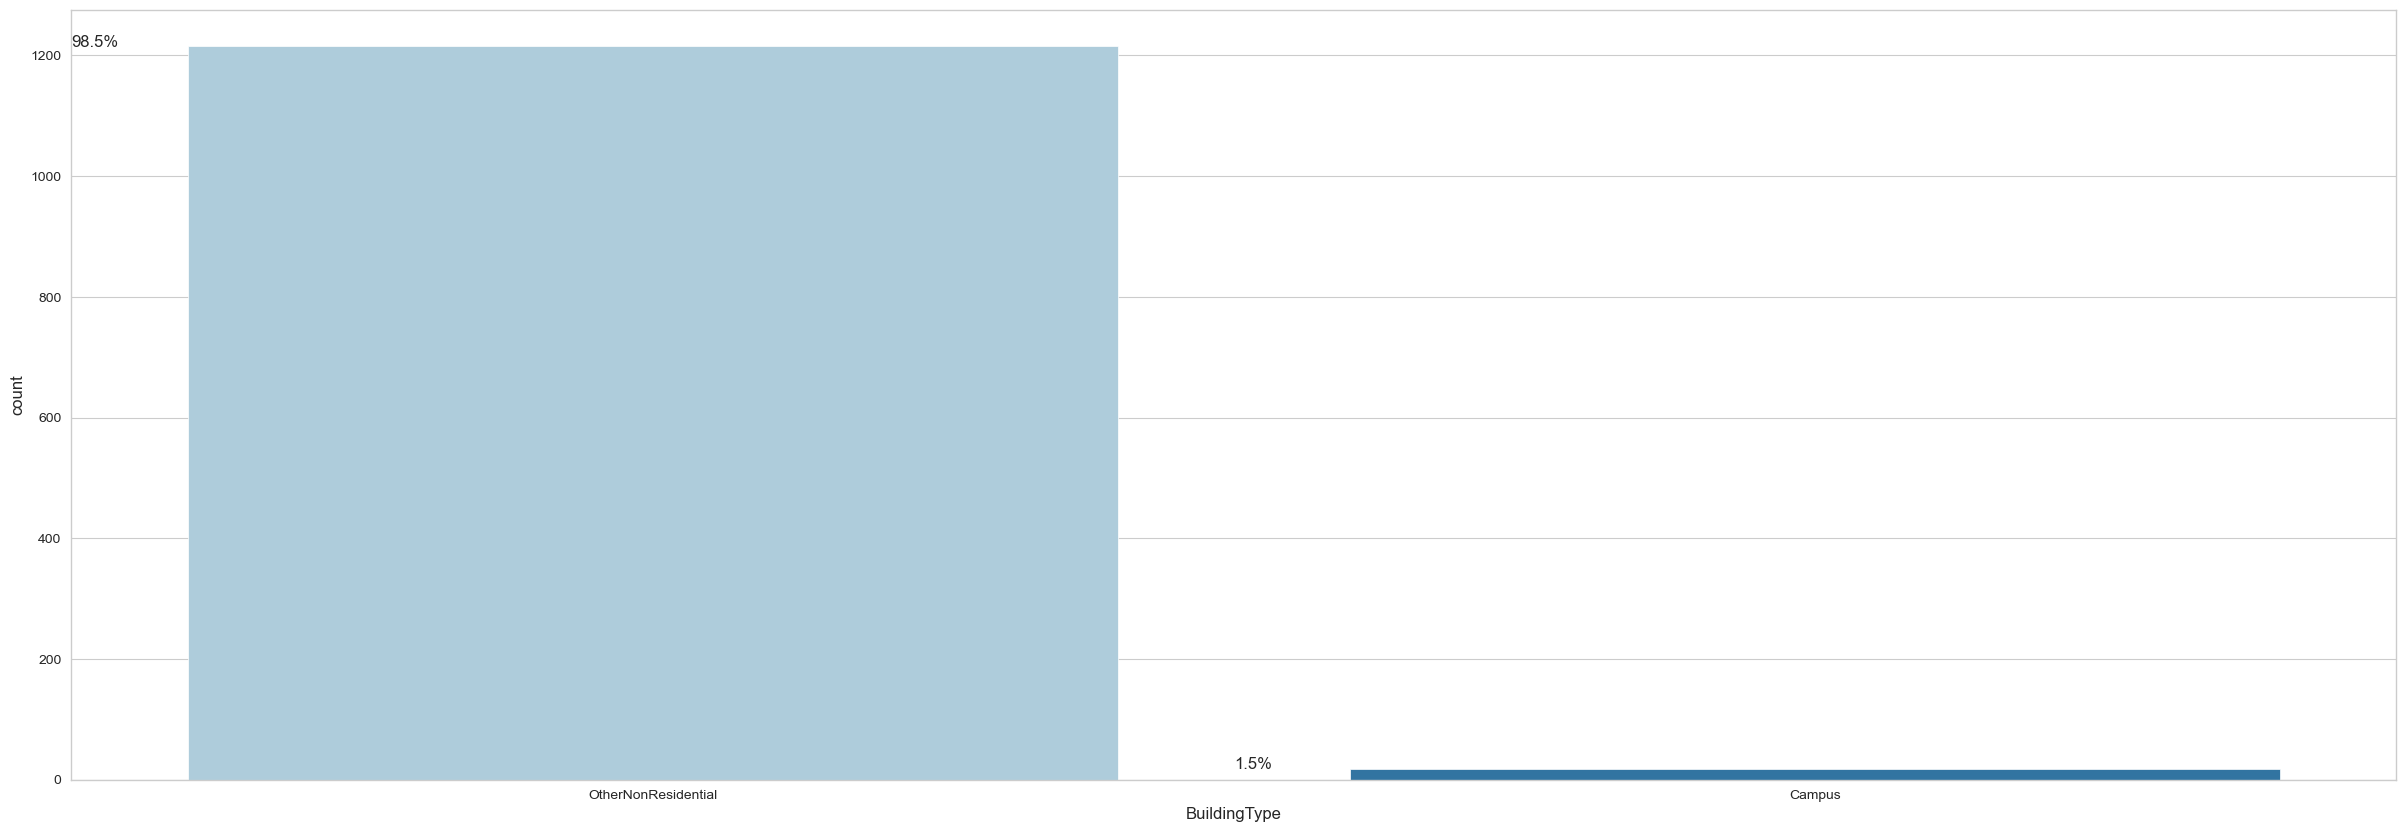

In [31]:
bar_perc(X_train, 'BuildingType',30,10)

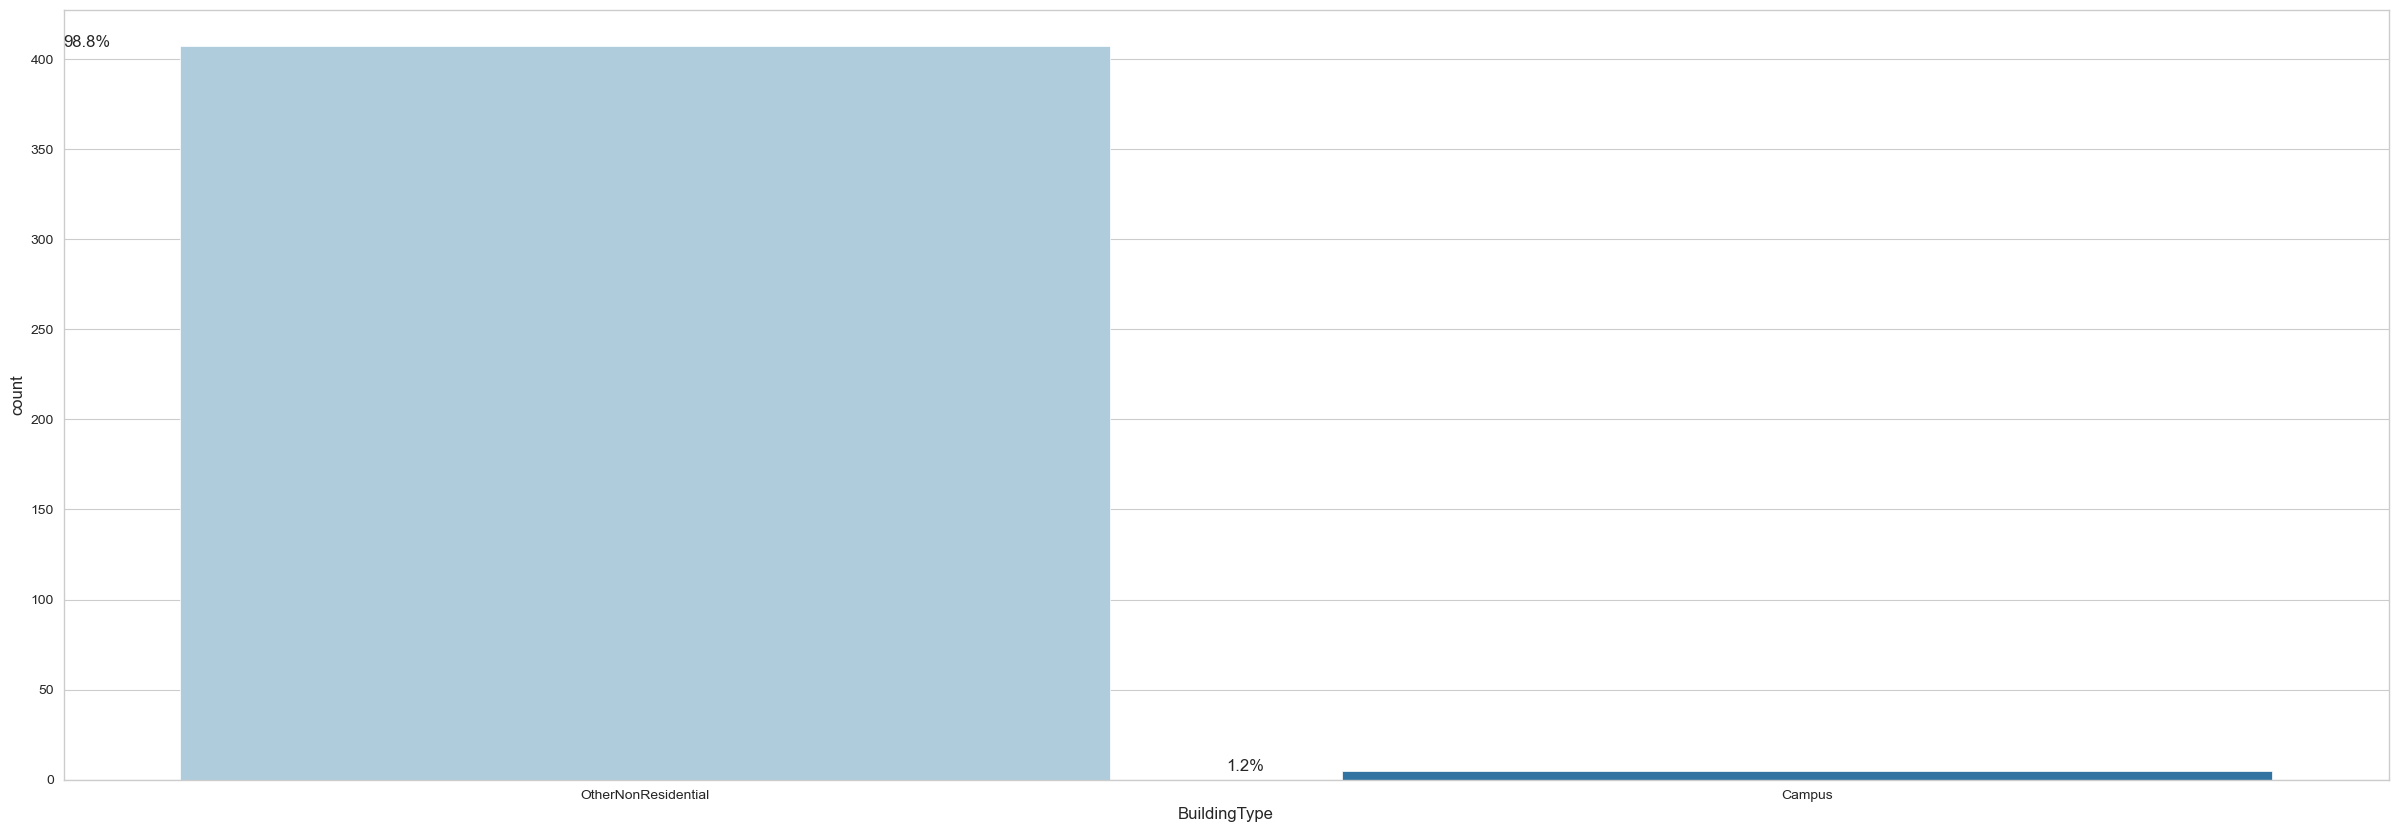

In [32]:
bar_perc(X_test, 'BuildingType',30,10)

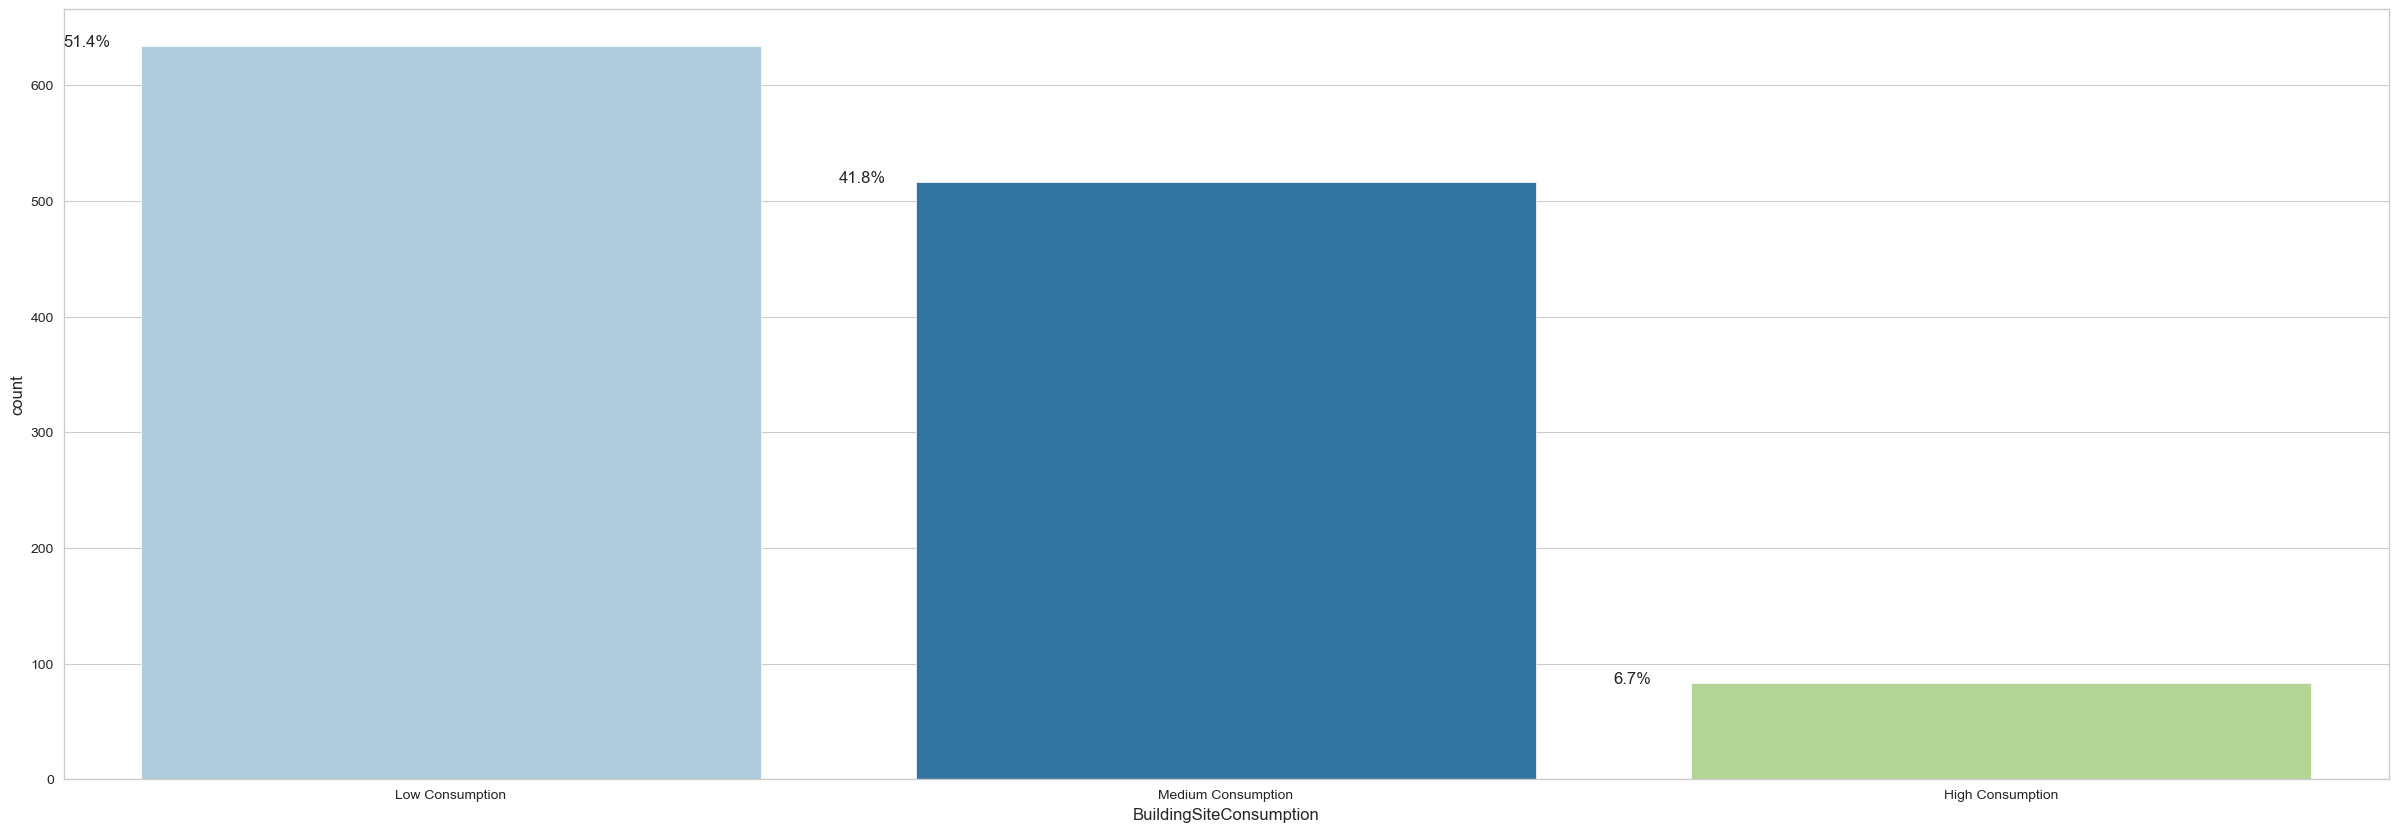

In [33]:
bar_perc(X_train, 'BuildingSiteConsumption',30,10)

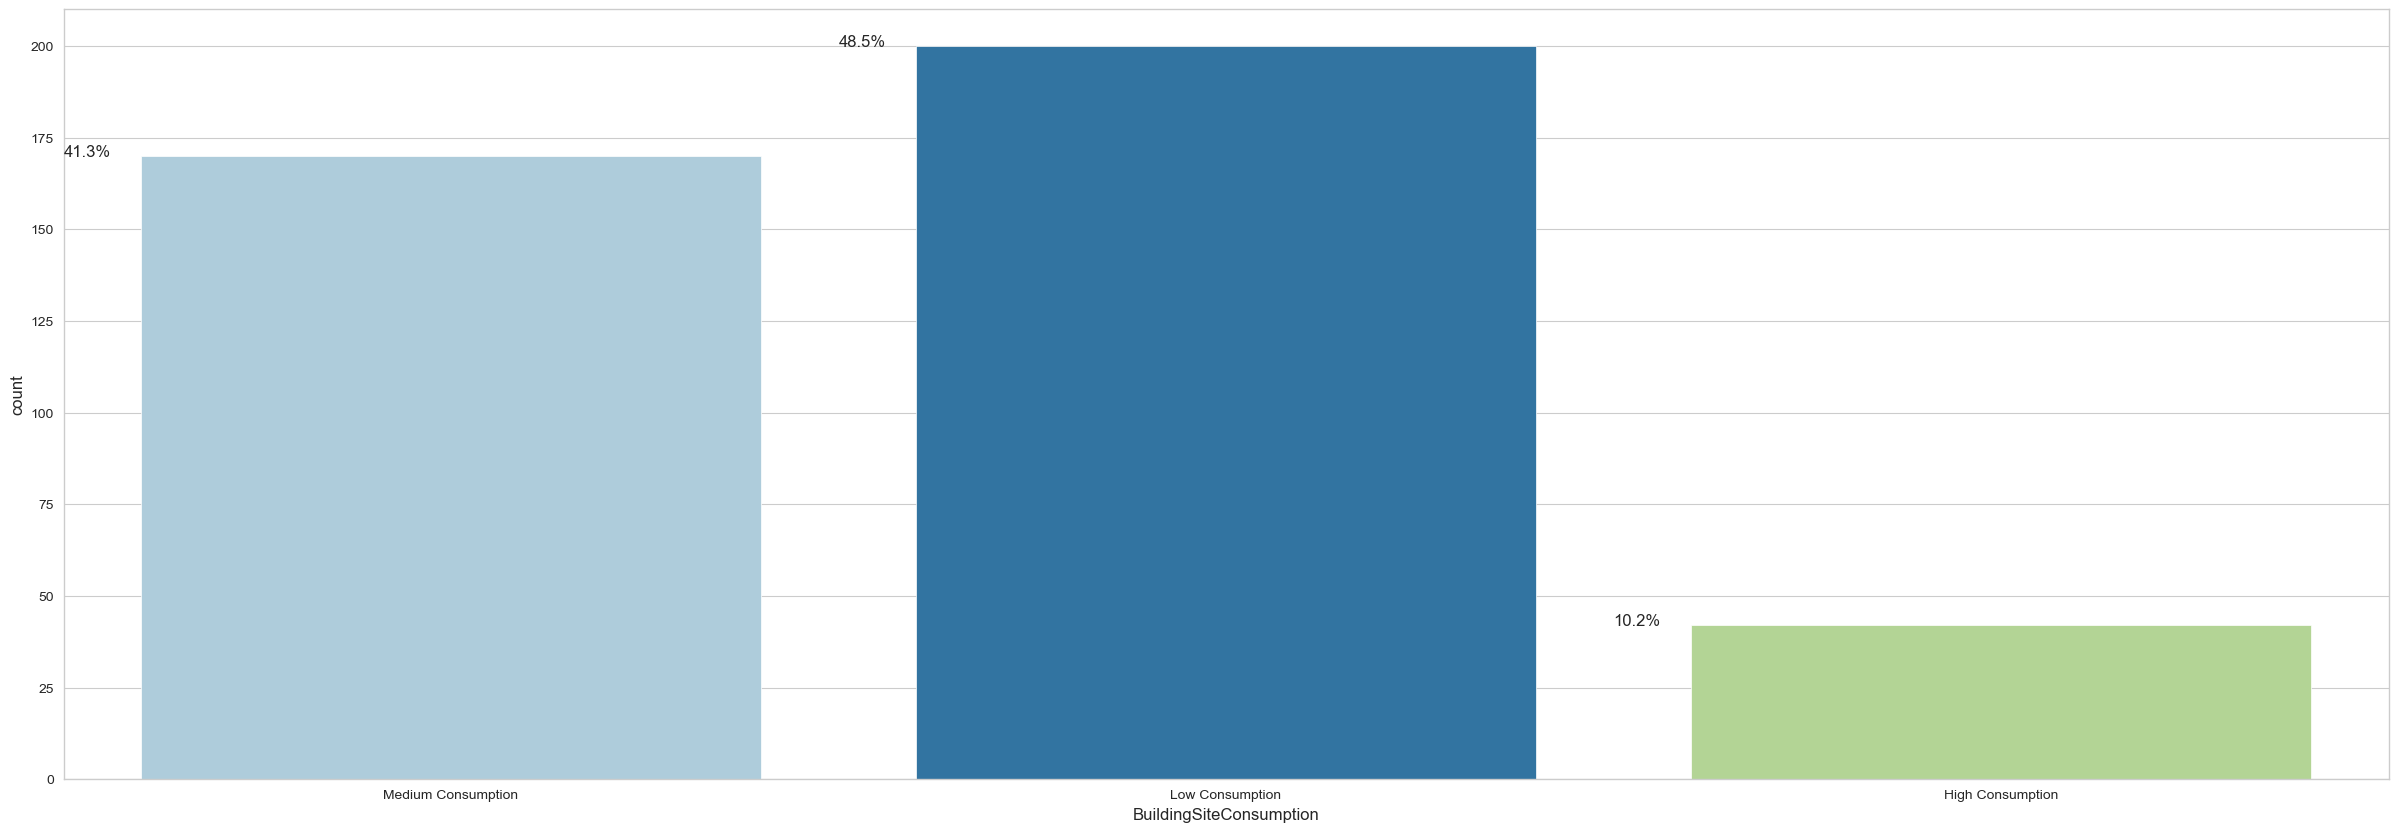

In [34]:
bar_perc(X_test, 'BuildingSiteConsumption',30,10)

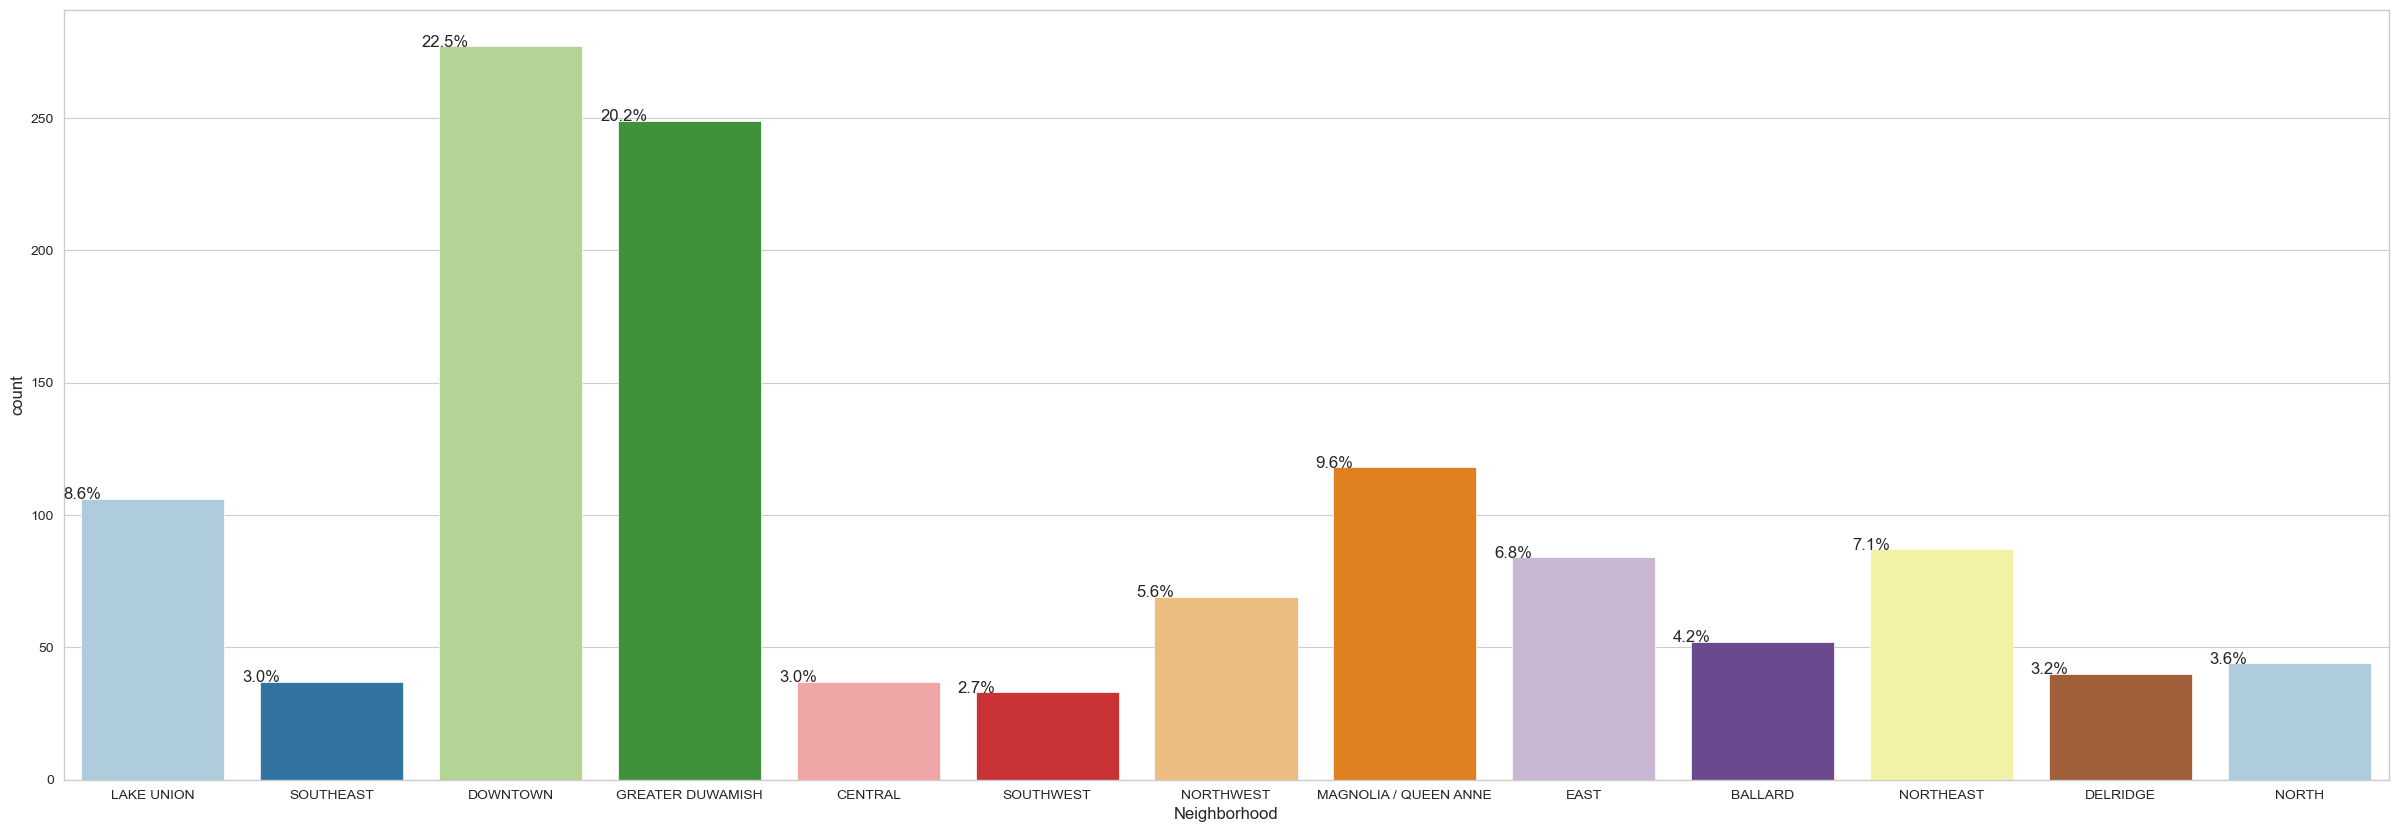

In [35]:
bar_perc(X_train, 'Neighborhood',30,10)

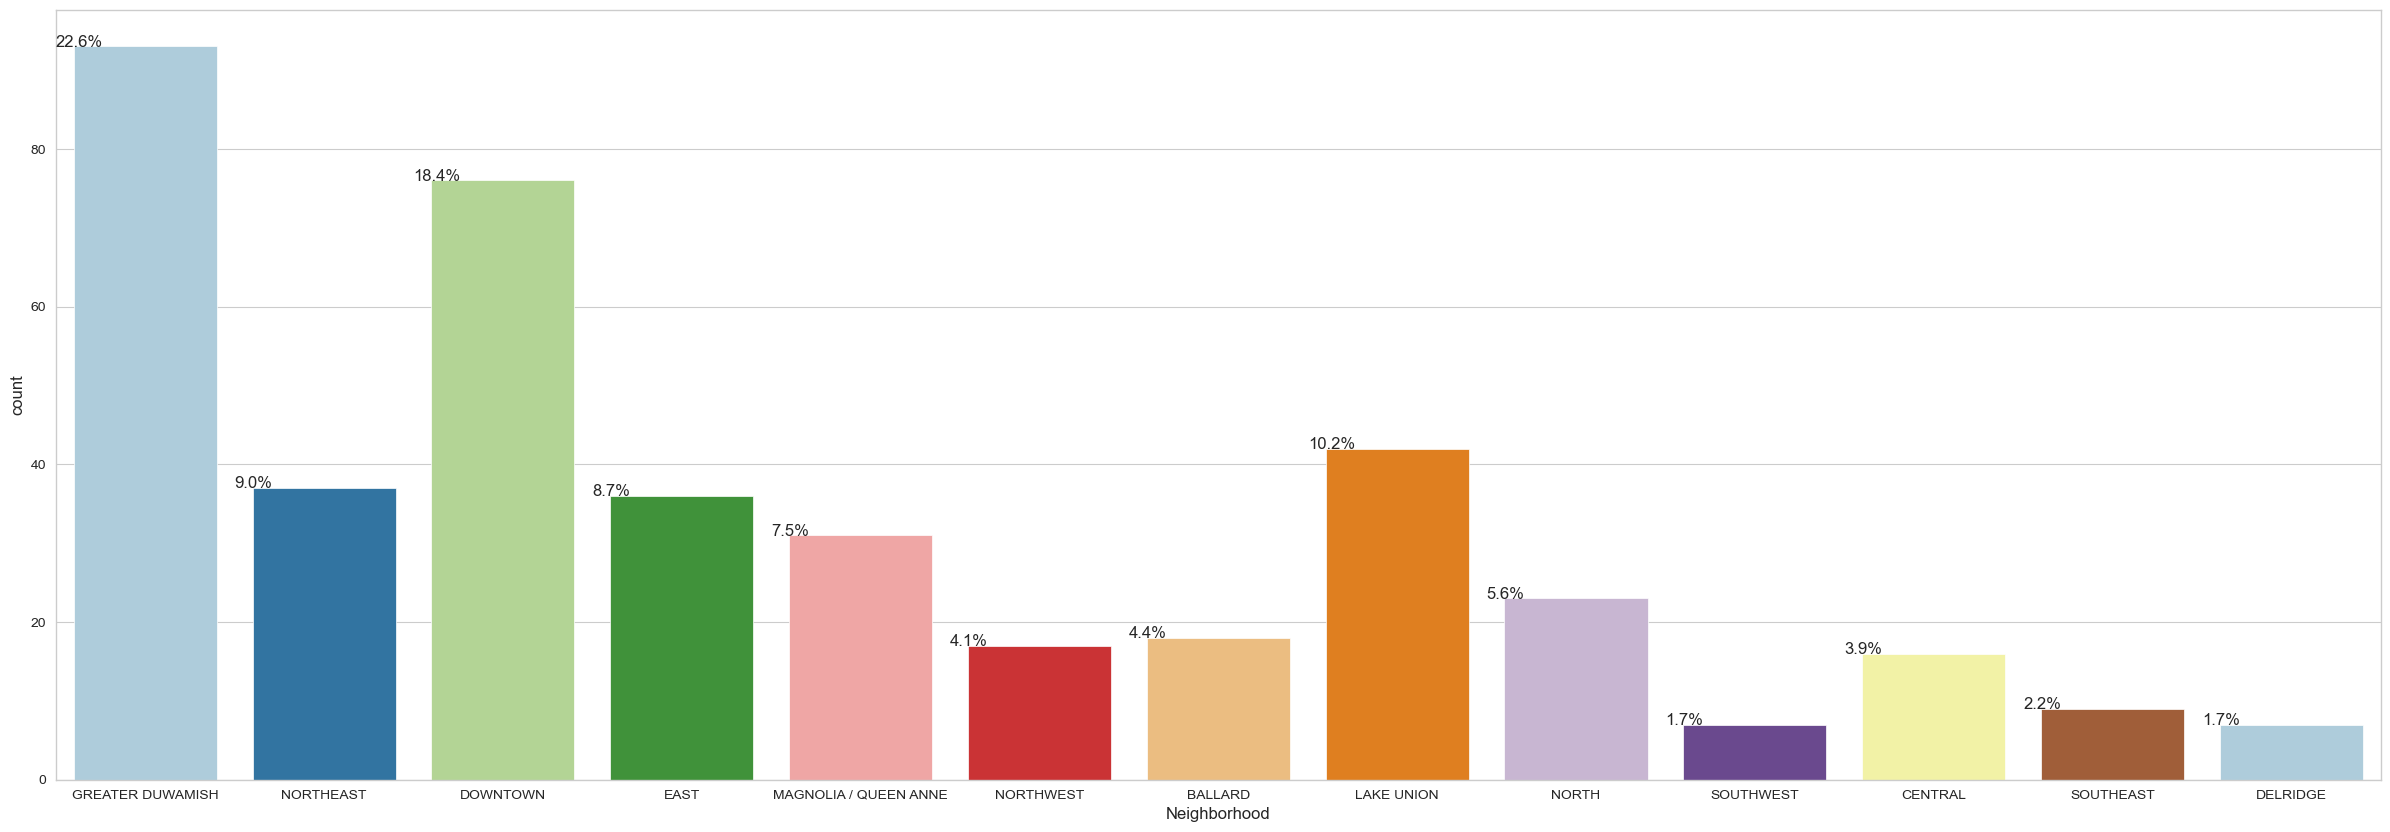

In [36]:
bar_perc(X_test, 'Neighborhood',30,10)

## 2.3. Étude échelle Log

Avant de modéliser, nous allons étudier si les données montrent plus de variations en échelle log : 

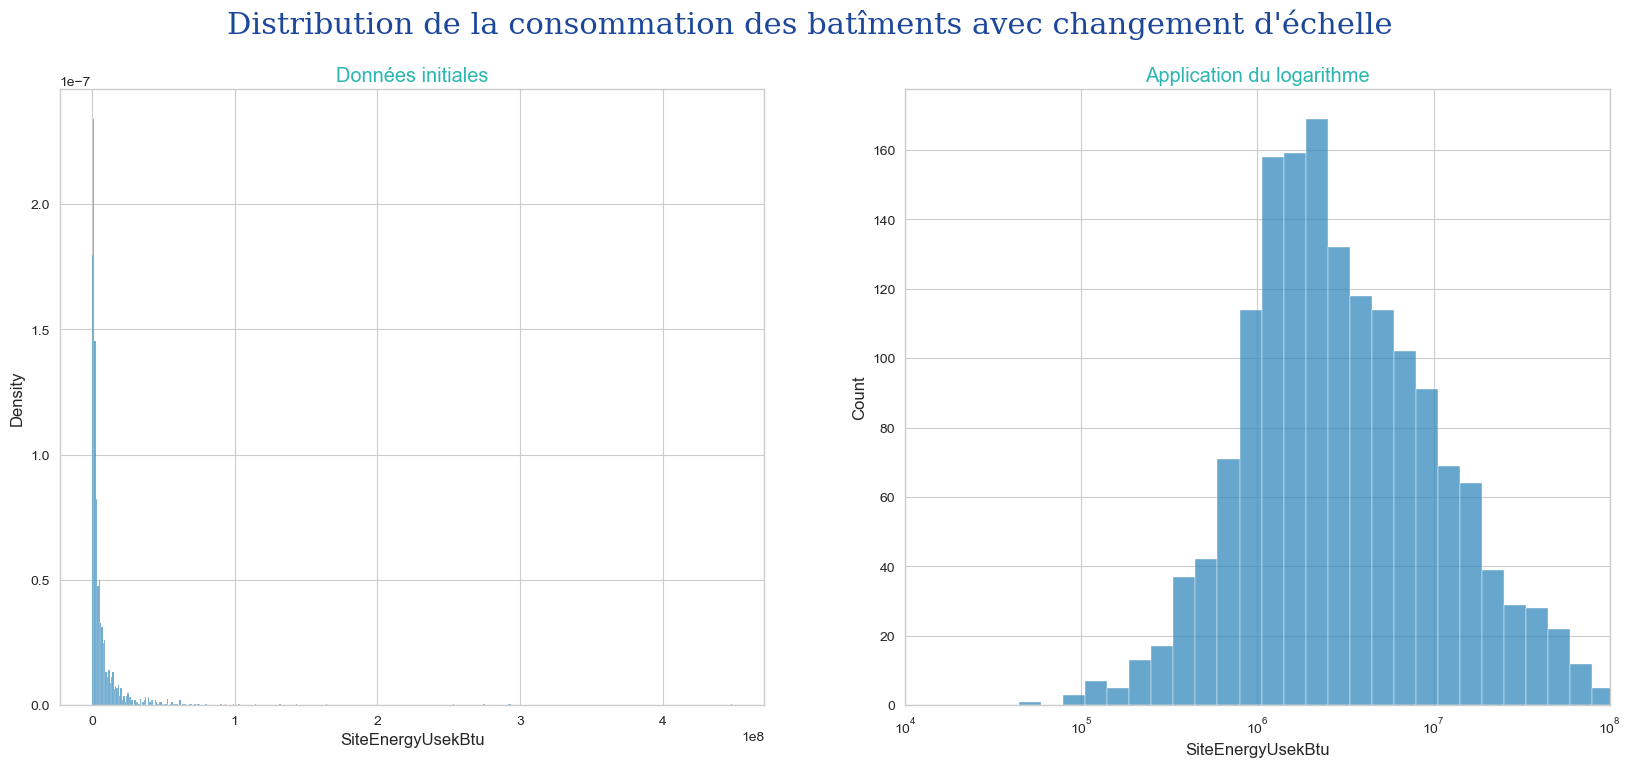

In [37]:

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'fontsize': 18,
             }

from sklearn.preprocessing import FunctionTransformer

logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
y=df[['SiteEnergyUsekBtu']]
y=y+10**-12
y_log = logtransformer.transform(y)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=y, x='SiteEnergyUsekBtu', stat="density", ax=axes[0])
axes[0].set_title("Données initiales", color='#2cb7b0')
sns.histplot(data=y,x='SiteEnergyUsekBtu',ax=axes[1],log_scale=True)
axes[1].set_title("Application du logarithme", color='#2cb7b0')
axes[1].set_xlim(10**4,10**8)
plt.suptitle("Distribution de la consommation des batîments avec changement d'échelle", fontdict=font_title, fontsize=22)
plt.show()

# Linear Regression Model

In [38]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display='diagram')


param_mlr = {"regressor__fit_intercept": [True, False],
             "regressor__normalize": [True, False]
            }
# Recherche des meilleurs paramètres avec GridsearchCV
mlr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_mlr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=LinearRegression(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            
                            param_grid=param_mlr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

In [40]:
#Entrainement sur les 2 variables à expliquer :
site_mlr_model = mlr_grid_cv.fit(X_train, Y_train)

## Modèle optimisé et évaluation du modèle optimisé

In [41]:
lm=site_mlr_model.named_steps['grid_search_mlr'].best_params_
lm

{'regressor__fit_intercept': False, 'regressor__normalize': True}

In [42]:
linear_model= Pipeline([("preprocessor", preprocessor), 
                     ("model", LinearRegression(fit_intercept=False,normalize= True))])

In [43]:
# Fonction pour évaluer le modèle 

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

#Retour des meilleurs scores NMAE et R2
#Stockage du dataframe de resultats du modèle
def model_scores(pip,step,model,X_train,Y_train,X_test,Y_test):
    df_results = pd.DataFrame.from_dict(pip.named_steps[step].cv_results_) \
                    .sort_values('rank_test_neg_mean_absolute_error')
    model.fit(X_train, Y_train)
    y_true = Y_test
    y_pred = model.predict(X_test)
    
    best_MAE = mean_absolute_error(y_true, y_pred) #accuracy_score(y_true, y_pred)
    best_r2 =  r2_score(y_true, y_pred)
    best_params = pip.named_steps[step].best_params_
    training_time = round((np.mean(df_results.mean_fit_time)*X_train.shape[0]),2)
    print("Meilleur score de MAE : {}\nMeilleur Score R2 : {}\nMeilleurs paramètres : {}\nTemps moyen d'entrainement : {}s"\
         .format(round(best_MAE,3), round(best_r2,3), best_params, training_time))
    return df_results


In [44]:
site_mlr_results = model_scores(site_mlr_model, 'grid_search_mlr',linear_model,X_train,Y_train,X_test,Y_test)

Meilleur score de MAE : 5854801.739
Meilleur Score R2 : 0.642
Meilleurs paramètres : {'regressor__fit_intercept': False, 'regressor__normalize': True}
Temps moyen d'entrainement : 31.97s


### Prediction Error Plot

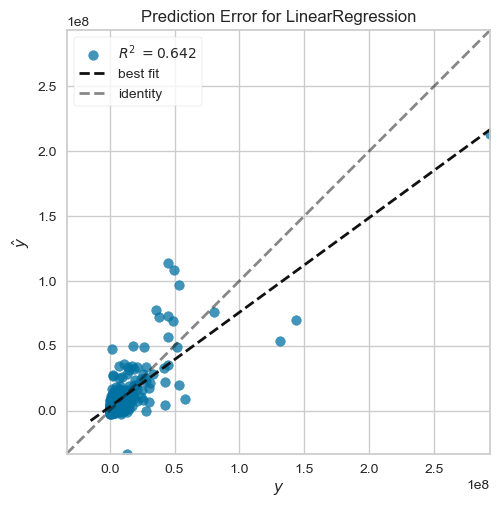

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [45]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
model = linear_model
visualizer = PredictionError(model)
model.fit(X_train, Y_train)
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

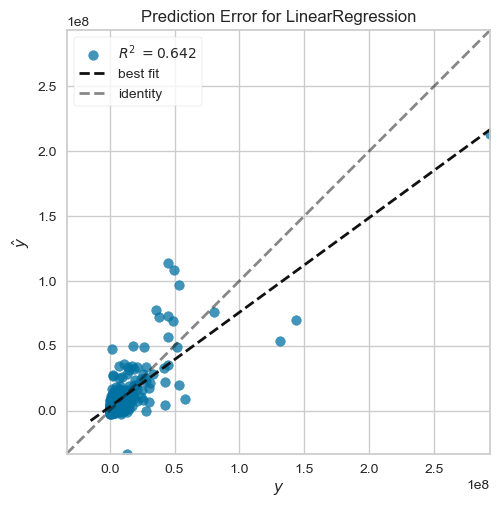

In [46]:
from yellowbrick.regressor import prediction_error
# Instantiate the linear model and visualizer
model = linear_model
visualizer = prediction_error(model, X_train, Y_train, X_test, Y_test)

### Residual Plot 

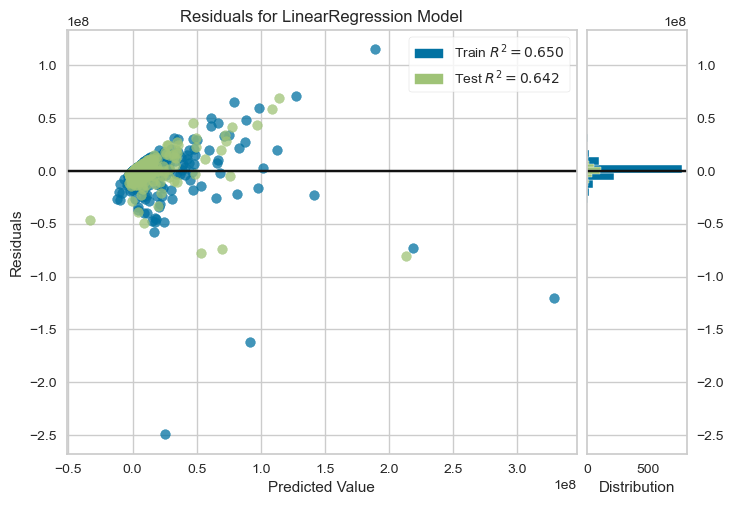

In [47]:
from yellowbrick.regressor import residuals_plot

# Create the visualizer, fit, score, and show it
viz = residuals_plot(model, X_train, Y_train, X_test, Y_test)

### Cooks distance

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  RobustScaler(unit_variance=True),
                                                  ['NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'LargestPropertyUseTypeGFA',
                                                   'SecondLargestPropertyUseTypeGFA',
                                                   'ThirdLargestPropertyUseTypeGFA',
                                                   'BuildingAge',
                                                   'GFABuildingRate',
                                                   'GFAParkingRate',
                                                   'GFAPerBuilding',
                                                   'GFAPerFloor',
                                                   'harvesine_distance']),
                                                 ('one_hot', OneHotEncoder(),
                                                  ['BuildingType']),
                                                 ('target', TargetEncoder(),
                                                  ['Neighborhood']),
                                                 ('ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['BuildingSiteConsumption'])])),
                ('model', CooksDistance(ax=<AxesSubplot:>))])

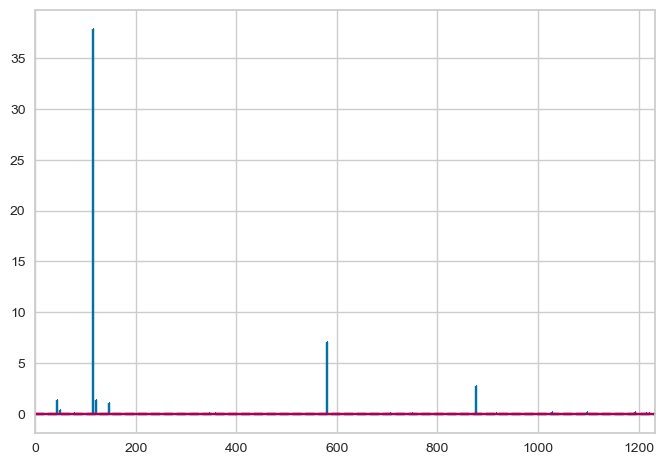

In [48]:
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete



# Instantiate and fit the visualizer
cooks_distance= Pipeline([("preprocessor", preprocessor), 
                     ("model", CooksDistance())])
visualizer = cooks_distance
visualizer.fit(X_train, Y_train)
visualizer               # Finalize and render the figure

La présence d'un si grand nombre de points hautement influents suggère que la régression linéaire peut ne pas convenir à cet ensemble de données. 

# Modèle ElasticNet

In [49]:
from sklearn.linear_model import ElasticNet

param_eNet = {"regressor__max_iter": [10, 100, 1000],
              "regressor__alpha": np.logspace(-4, 0, num=5),
              "regressor__l1_ratio": np.arange(0.0, 1.1, 0.1)}

eNet_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_enet', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=ElasticNet(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_eNet,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

In [50]:
site_eNet_model = eNet_grid_cv.fit(X_train, Y_train)


### Modèle optimisé et évaluation du modèle

In [51]:
eNet=site_eNet_model.named_steps['grid_search_enet'].best_params_
eNet

{'regressor__alpha': 1.0,
 'regressor__l1_ratio': 0.30000000000000004,
 'regressor__max_iter': 10}

In [52]:
eNet_model= Pipeline([("preprocessor", preprocessor), 
                     ("model", ElasticNet(alpha=1.0,l1_ratio=0.30000000000000004,max_iter=10))])

In [53]:
site_eNet_results = model_scores(site_eNet_model, 'grid_search_enet',eNet_model,X_train,Y_train,X_test,Y_test)

Meilleur score de MAE : 5323651.821
Meilleur Score R2 : 0.616
Meilleurs paramètres : {'regressor__alpha': 1.0, 'regressor__l1_ratio': 0.30000000000000004, 'regressor__max_iter': 10}
Temps moyen d'entrainement : 15.03s


### Prediction Error Plot et Residual Plot

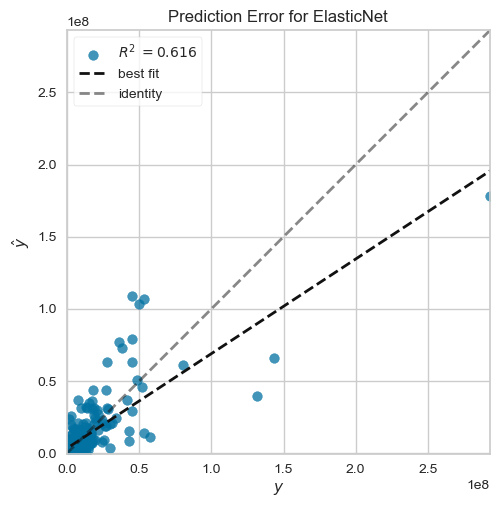

In [54]:
from yellowbrick.regressor import prediction_error
# Instantiate the linear model and visualizer
model = eNet_model
visualizer = prediction_error(model, X_train, Y_train, X_test, Y_test)

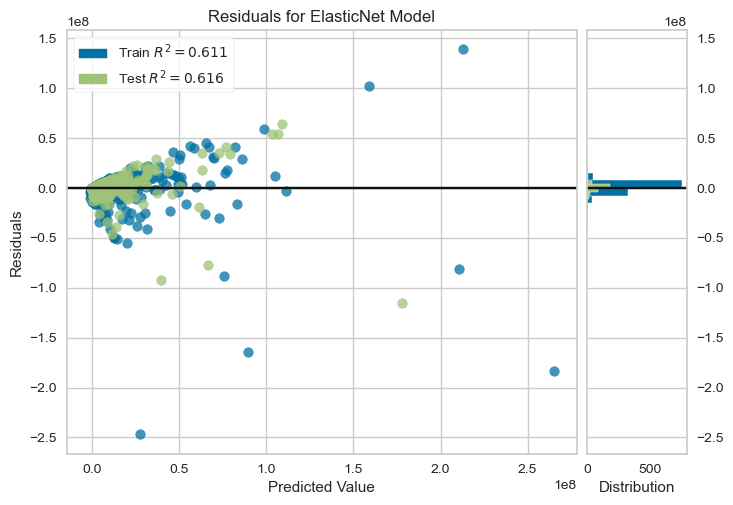

In [55]:
from yellowbrick.regressor import residuals_plot

# Create the visualizer, fit, score, and show it
viz = residuals_plot(model, X_train, Y_train, X_test, Y_test)

# Modèle Support Vector Regression (SVR)

In [56]:
from sklearn.svm import LinearSVR

param_svr = {'regressor__C' : np.logspace(-4, 0, 5),
             'regressor__epsilon' : [0, 0.01, 0.1, 0.5, 1, 2],
             'regressor__loss' : ["epsilon_insensitive","squared_epsilon_insensitive"],
             'regressor__max_iter': [10, 100, 1000]}

svr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_svr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=LinearSVR(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_svr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [65]:
site_svr_model = svr_grid_cv.fit(X_train, Y_train)

### Modèle optimisé et évaluation du modèle 

In [66]:
svr=site_svr_model.named_steps['grid_search_svr'].best_params_
svr

{'regressor__C': 0.0001,
 'regressor__epsilon': 2,
 'regressor__loss': 'squared_epsilon_insensitive',
 'regressor__max_iter': 100}

In [63]:
svr_model= Pipeline([("preprocessor", preprocessor), 
                     ("model", LinearSVR(C=0.001,epsilon=2,loss='squared_epsilon_insensitive',max_iter=100))])

In [64]:
site_svr_results = model_scores(site_svr_model, 'grid_search_svr',svr_model,X_train, Y_train, X_test, Y_test)

Meilleur score de MAE : 155251067.358
Meilleur Score R2 : -71.154
Meilleurs paramètres : {'regressor__C': 0.001, 'regressor__epsilon': 2, 'regressor__loss': 'squared_epsilon_insensitive', 'regressor__max_iter': 100}
Temps moyen d'entrainement : 45.74s


### Prediction Error Plot et Residual Plot

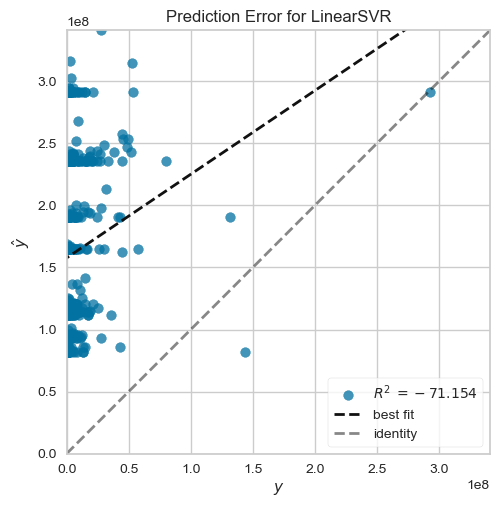

In [67]:
# Instantiate the linear model and visualizer
model = svr_model
visualizer = prediction_error(model, X_train, Y_train, X_test, Y_test)

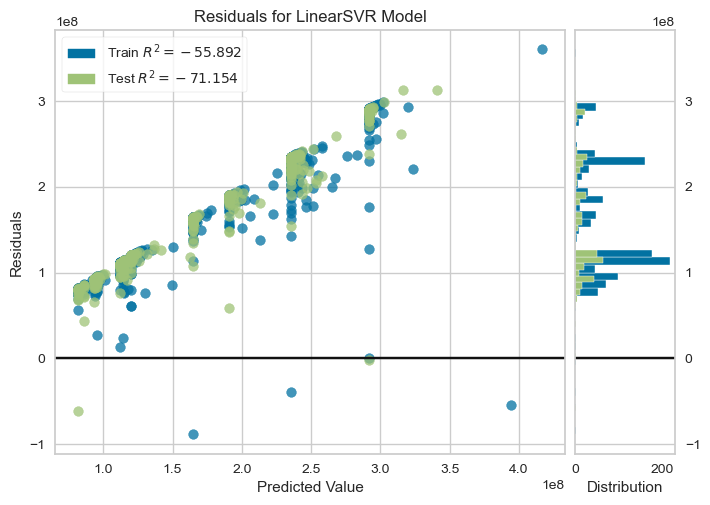

In [68]:
# Create the visualizer, fit, score, and show it
viz = residuals_plot(model, X_train, Y_train, X_test, Y_test)

#  Modèles non linéaires
# RandomForestRegressor

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

param_rfr = {'regressor__max_features' : [1, 2],
             'regressor__max_depth': [3,5,7],
             'regressor__bootstrap' : [True,False],
             'regressor__n_estimators': [100,300],
            }

rfr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_rfr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=RandomForestRegressor(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_rfr,
                            cv=KFold(n_splits=10, shuffle=True, random_state=45),
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [70]:
site_rfr_model = rfr_grid_cv.fit(X_train, Y_train)

### Évaluation du modèle optimisé

In [71]:
rf=site_rfr_model.named_steps['grid_search_rfr'].best_params_
rf

{'regressor__bootstrap': False,
 'regressor__max_depth': 7,
 'regressor__max_features': 2,
 'regressor__n_estimators': 300}

In [72]:
rf_model= Pipeline([("preprocessor", preprocessor), 
                     ("model", RandomForestRegressor(bootstrap=False,max_depth=7,max_features=2,n_estimators=300))])

In [73]:
site_rfr_results = model_scores(site_rfr_model, 'grid_search_rfr',rf_model,X_train, Y_train, X_test, Y_test)

Meilleur score de MAE : 4268403.575
Meilleur Score R2 : 0.791
Meilleurs paramètres : {'regressor__bootstrap': False, 'regressor__max_depth': 7, 'regressor__max_features': 2, 'regressor__n_estimators': 300}
Temps moyen d'entrainement : 628.65s


### Prediction Error Plot et Residual Plot

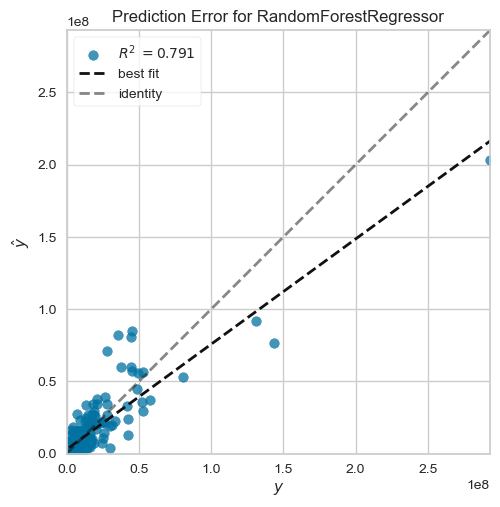

In [74]:
# Instantiate the linear model and visualizer
model = rf_model
visualizer = prediction_error(model, X_train, Y_train, X_test, Y_test)

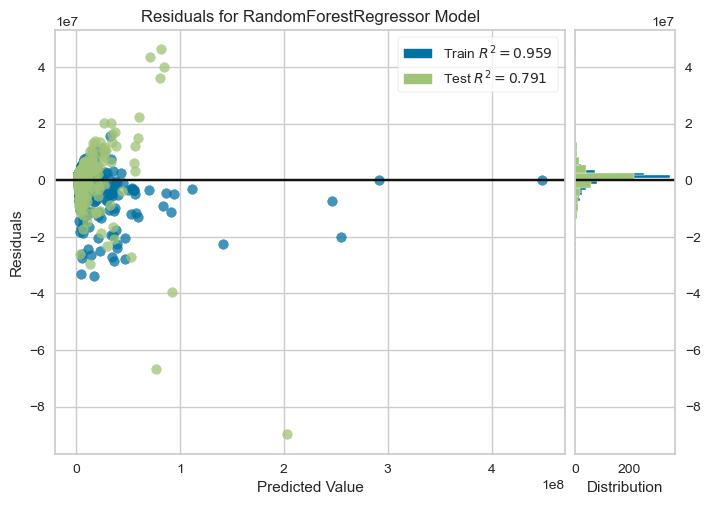

In [75]:
# Create the visualizer, fit, score, and show it
viz = residuals_plot(model, X_train, Y_train, X_test, Y_test)
# Données à stratifier pour équilibrer pour les jeux de données

# XGBoost

In [76]:
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

param_xgb = {'regressor__learning_rate' : [0.01, 0.04,0.10],
             'regressor__max_depth': [2.9,3,3.1],
             'regressor__n_estimators': [79,80,81],
             'regressor__reg_alpha': [0.10,0.15,0.20],
             'regressor__reg_lambda': [0.65,0.7,0.75],
             'regressor__min_child_weight' : [5],
             'regressor__gamma': [0.4,0.5,0.6],
            }

xgb = XGBRegressor()
ttr = TransformedTargetRegressor(regressor=xgb, func=np.log,inverse_func=np.exp)

xgb_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_xgb', GridSearchCV(estimator=ttr,
                            param_grid=param_xgb,
                            cv=10,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [77]:
site_xgb_model = xgb_grid_cv.fit(X_train, Y_train)

###  Évaluation du modèle optimisé

In [78]:
xgb=site_xgb_model.named_steps['grid_search_xgb'].best_params_
xgb

{'regressor__gamma': 0.4,
 'regressor__learning_rate': 0.1,
 'regressor__max_depth': 3,
 'regressor__min_child_weight': 5,
 'regressor__n_estimators': 81,
 'regressor__reg_alpha': 0.2,
 'regressor__reg_lambda': 0.65}

In [79]:
from xgboost import XGBRegressor
xgb_model= Pipeline([("preprocessor", preprocessor), 
                     ("model", XGBRegressor(gamma=0.4,n_estimators=81,max_depth=3,learning_rate=0.1,reg_alpha=0.2,reg_lambda=0.65,min_child_weight=5))])

In [80]:
site_xgb_results = model_scores(site_xgb_model, 'grid_search_xgb',xgb_model,X_train, Y_train, X_test, Y_test)

Meilleur score de MAE : 4236978.655
Meilleur Score R2 : 0.788
Meilleurs paramètres : {'regressor__gamma': 0.4, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__min_child_weight': 5, 'regressor__n_estimators': 81, 'regressor__reg_alpha': 0.2, 'regressor__reg_lambda': 0.65}
Temps moyen d'entrainement : 75.79s


### Prediction Error Plot et Residual Plot

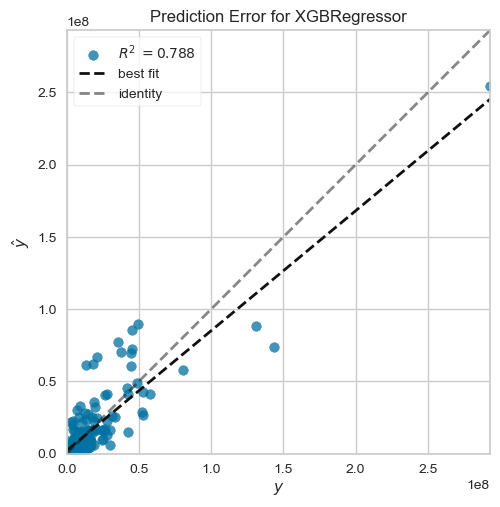

In [81]:
# Instantiate the linear model and visualizer
model = xgb_model
visualizer = prediction_error(model, X_train, Y_train, X_test, Y_test)

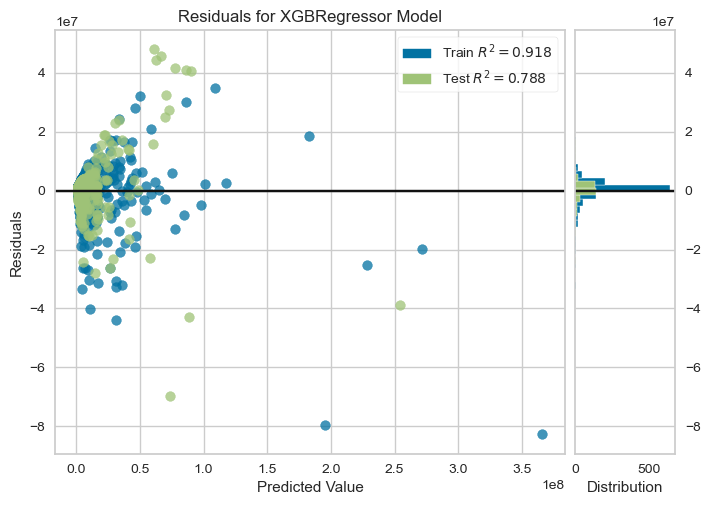

In [82]:
# Create the visualizer, fit, score, and show it
viz = residuals_plot(model, X_train, Y_train, X_test, Y_test)

# Comparaison des modèles

In [83]:
metrics = ['mean_fit_time', 'mean_score_time',
           'mean_test_neg_mean_absolute_error',
           'mean_train_neg_mean_absolute_error']
site_compare_metrics = pd.concat([pd.DataFrame(site_rfr_results[metrics].mean(), columns=['RandomForest']),
           pd.DataFrame(site_xgb_results[metrics].mean(), columns=['XGBoost']),
           pd.DataFrame(site_svr_results[metrics].mean(), columns=['LinearSVR']),
           pd.DataFrame(site_eNet_results[metrics].mean(), columns=['ElasticNet']),
           pd.DataFrame(site_mlr_results[metrics].mean(), columns=['LinearRegression'])
          ], axis=1)
site_final_metrics_compare = pd.DataFrame(columns=metrics, 
                                     index=['RandomForest','XGBoost',
                                            'LinearSVR','ElasticNet',
                                            'LinearRegression'])
for m in metrics:
    site_final_metrics_compare[m] = site_compare_metrics.loc[m]

In [159]:
site_final_metrics_compare

mean_fit_time  mean_score_time  \
RandomForest           0.538334         0.034049   
XGBoost                0.061170         0.001060   
LinearSVR              0.032591         0.001675   
ElasticNet             0.013569         0.001859   
LinearRegression       0.019701         0.002501   

                  mean_test_neg_mean_absolute_error  \
RandomForest                          -5.055051e+06   
XGBoost                               -6.113181e+06   
LinearSVR                             -5.505512e+21   
ElasticNet                            -4.058935e+08   
LinearRegression                      -5.267313e+08   

                  mean_train_neg_mean_absolute_error  
RandomForest                           -4.501700e+06  
XGBoost                                -5.917857e+06  
LinearSVR                              -5.296032e+21  
ElasticNet                             -1.348027e+07  
LinearRegression                       -1.295071e+07

## Plot pour comparer les modèles 

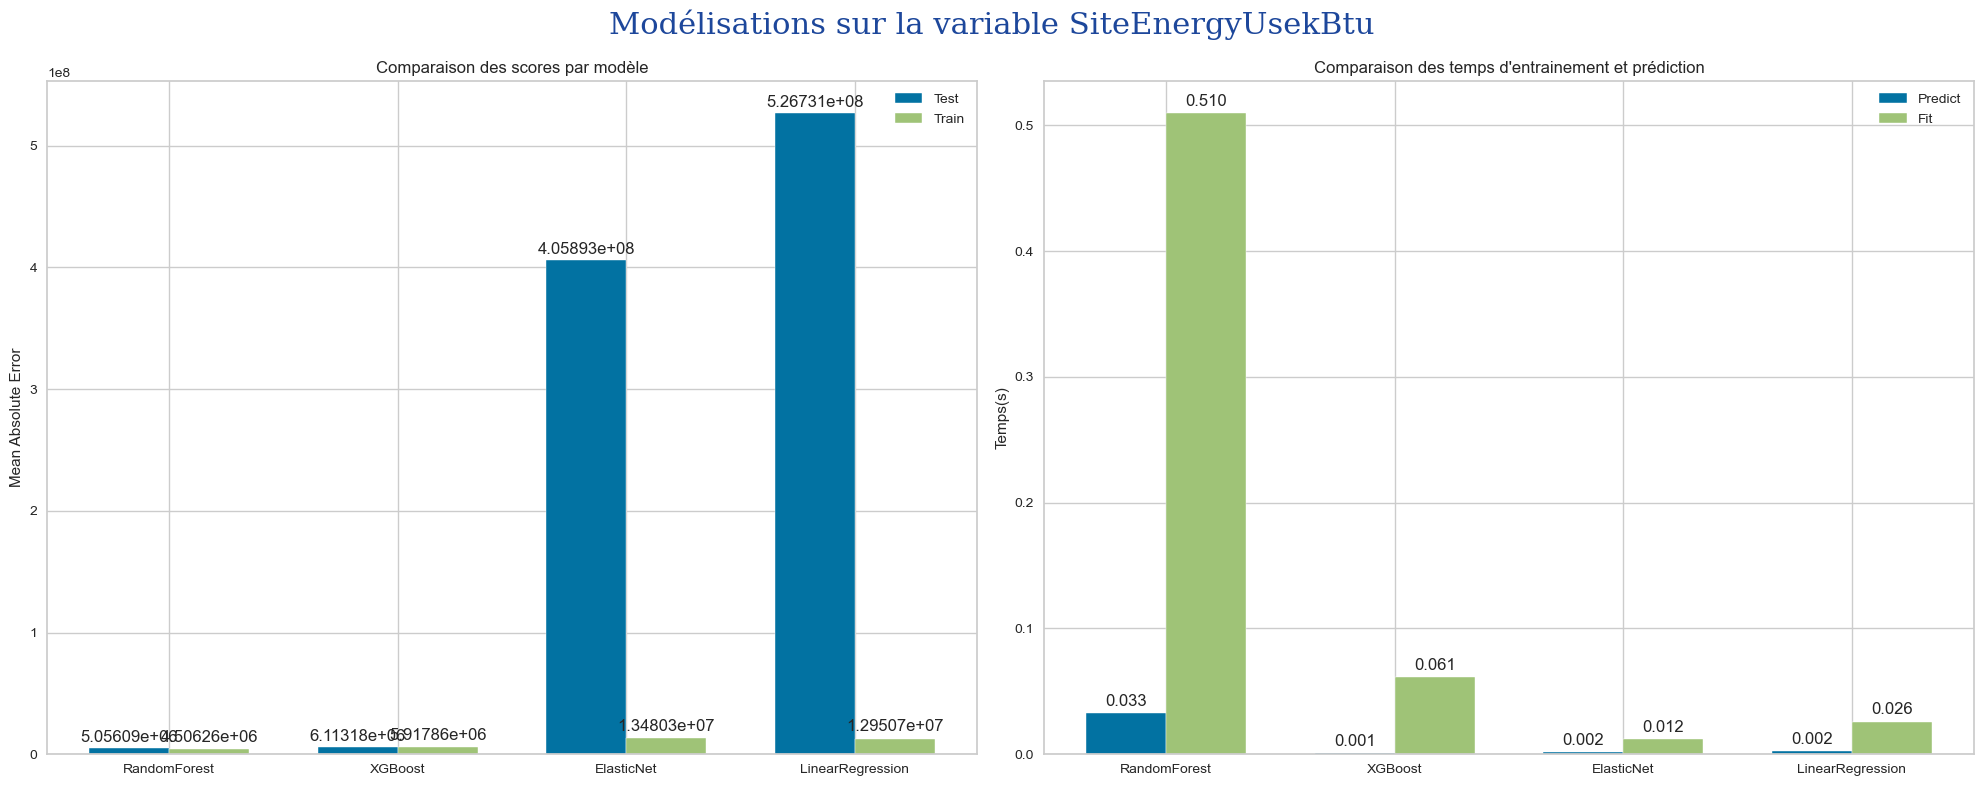

In [84]:
#On élimine le modèle SVR de cette représentation car hors normes
site_final_metrics_compare = site_final_metrics_compare[site_final_metrics_compare.index != 'LinearSVR']
x = np.arange(len(site_final_metrics_compare.index))
width = 0.35

fig, ax = plt.subplots(1,2,figsize=(20,8), sharey=False, sharex=False)

scores1 = ax[0].bar(x - width/2, -1*site_final_metrics_compare['mean_test_neg_mean_absolute_error'], width, label='Test')
scores2 = ax[0].bar(x + width/2, -1*site_final_metrics_compare['mean_train_neg_mean_absolute_error'], width, label='Train')
ax[0].set_ylabel('Mean Absolute Error')
ax[0].set_title('Comparaison des scores par modèle')
ax[0].set_xticks(x)
ax[0].set_xticklabels(site_final_metrics_compare.index)
ax[0].legend()
ax[0].bar_label(scores1, padding=2)
ax[0].bar_label(scores2, padding=3)

times1 = ax[1].bar(x - width/2, site_final_metrics_compare['mean_score_time'], width, label='Predict')
times2 = ax[1].bar(x + width/2, site_final_metrics_compare['mean_fit_time'], width, label='Fit')
ax[1].set_ylabel('Temps(s)')
ax[1].set_title("Comparaison des temps d'entrainement et prédiction")
ax[1].set_xticks(x)
ax[1].set_xticklabels(site_final_metrics_compare.index)
ax[1].legend()
ax[1].bar_label(times1, padding=3, fmt='%.3f')
ax[1].bar_label(times2, padding=3, fmt='%.3f')

plt.suptitle("Modélisations sur la variable SiteEnergyUsekBtu", fontdict=font_title, fontsize=22)
fig.tight_layout()

plt.show()

En comparant les différents modèles, le modèle de XGBoost semble être le plus adapté car il est le plus précis avec Random Forest Regressor (R² est plus proche de 1) et a un temps d'éxécution moindre que le Random Forest Regressor.

## Affichage GridScore et meilleurs hyperparamètres

In [85]:
#Fonction d'affichage des scores de GridSearch pour chacun des paramètres
def plot_search_results(grid, title): 
       
    ## Résultats de la GridSearch
    results = grid.cv_results_
    means_test = results['mean_test_neg_mean_absolute_error']
    stds_test = results['std_test_neg_mean_absolute_error']
    means_train = results['mean_train_neg_mean_absolute_error']
    stds_train = results['std_train_neg_mean_absolute_error']

    ## Index de valeurs par hyper-paramètre
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    
    ## Plot des résultats
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Scores par paramètres pour la variable {}'.format(title), 
                 fontdict=font_title, fontsize=22)
    fig.text(0.04, 0.5, 'NEG MEAN ABSOLUTE ERROR SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test', color="#2cb7b0")
        ax[i].errorbar(x, y_2, e_2, linestyle='--', marker='o', label='train', color="#337da4")
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()
    
    print("\nRappel des meilleurs paramètres :\n{}".format(grid.best_params_))

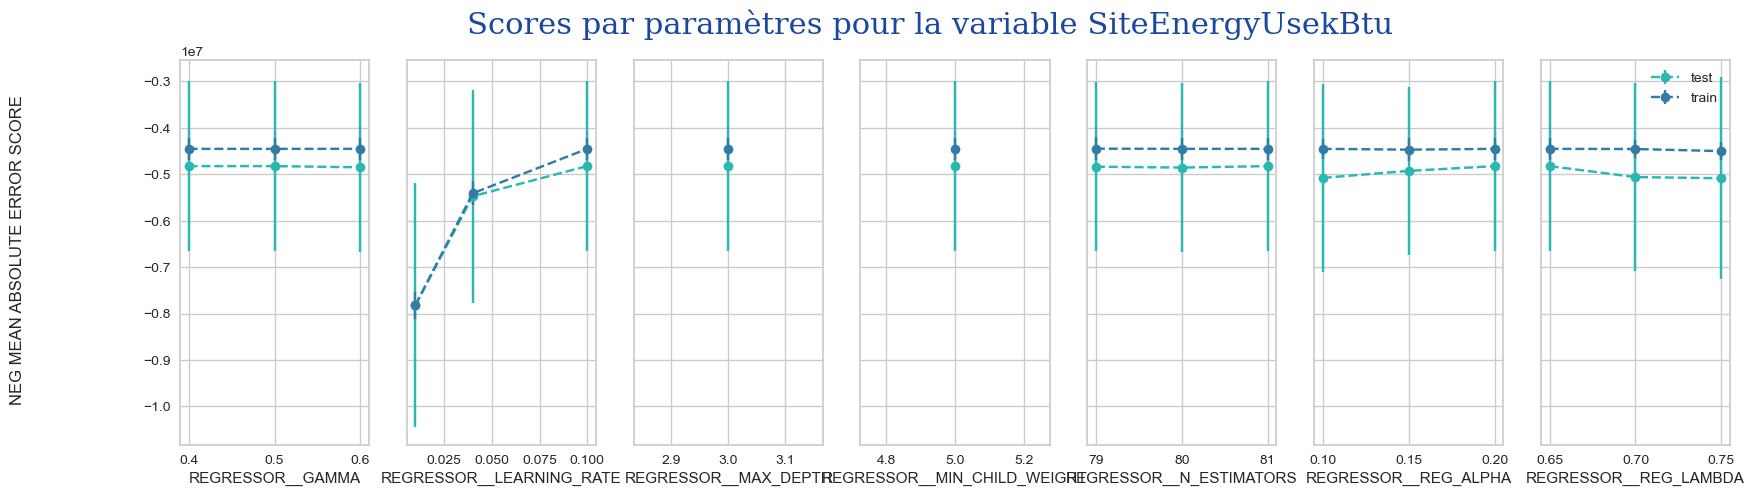


Rappel des meilleurs paramètres :
{'regressor__gamma': 0.4, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__min_child_weight': 5, 'regressor__n_estimators': 81, 'regressor__reg_alpha': 0.2, 'regressor__reg_lambda': 0.65}


In [86]:
plot_search_results(site_xgb_model.named_steps['grid_search_xgb'], title="SiteEnergyUsekBtu")

In [87]:
xgb=site_xgb_model.named_steps['grid_search_xgb'].best_params_
xgb

{'regressor__gamma': 0.4,
 'regressor__learning_rate': 0.1,
 'regressor__max_depth': 3,
 'regressor__min_child_weight': 5,
 'regressor__n_estimators': 81,
 'regressor__reg_alpha': 0.2,
 'regressor__reg_lambda': 0.65}

### Modèle final XGBoost

In [88]:
xgb_model= Pipeline([("preprocessor", preprocessor), 
                     ("model", XGBRegressor(gamma=0.4,n_estimators=81,max_depth=3,learning_rate=0.1,reg_alpha=0.2,reg_lambda=0.65,min_child_weight=5))])

# Feature importances 

In [89]:
import eli5
xgb_model.fit(X_train, Y_train)
eli5.show_weights(xgb_model.named_steps["model"])

In [90]:
ohe_categories = preprocessor.named_transformers_["one_hot"].categories_
#target_categories=preprocessor.named_transformers_["target"].categories_
ord_categories=preprocessor.named_transformers_["ord"].categories_
new_ohe_features=[f"{col}__{val}" for col, vals in zip(one_hot_features, ohe_categories) for val in vals]
#new_target_features=[f"{col}__{val}" for col, vals in zip(target_features, target_categories) for val in vals]


In [91]:
all_features = numeric_features + new_ohe_features + target_features + ord_features

In [92]:
eli5.show_weights(xgb_model.named_steps["model"], feature_names=all_features)

In [93]:
i = 4
eli5.show_prediction(xgb_model.named_steps["model"], 
                     xgb_model.named_steps["preprocessor"].transform(X_test)[i],
                     feature_names=all_features, show_feature_values=True)

# SHAP Plots

In [94]:
import shap
# Need to load JS vis in the notebook
shap.initjs() 

In [95]:
explainer = shap.TreeExplainer(xgb_model.named_steps["model"])

In [96]:
observations = xgb_model.named_steps["preprocessor"].transform(X_train.sample(1000, random_state=42))
shap_values = explainer.shap_values(observations)

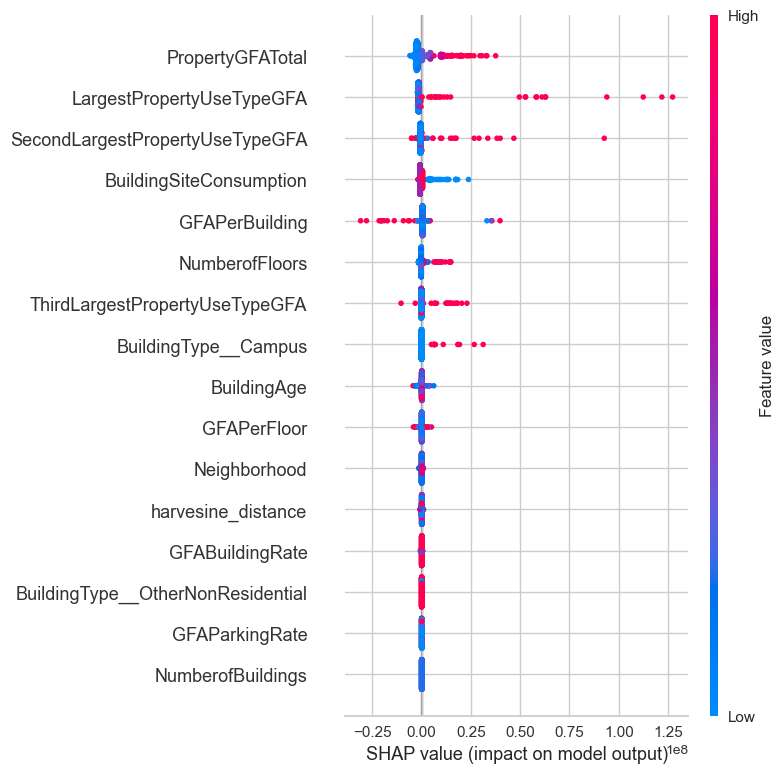

In [97]:
i = 5
shap.summary_plot(shap_values, features=observations, feature_names=all_features)

## Summary plot

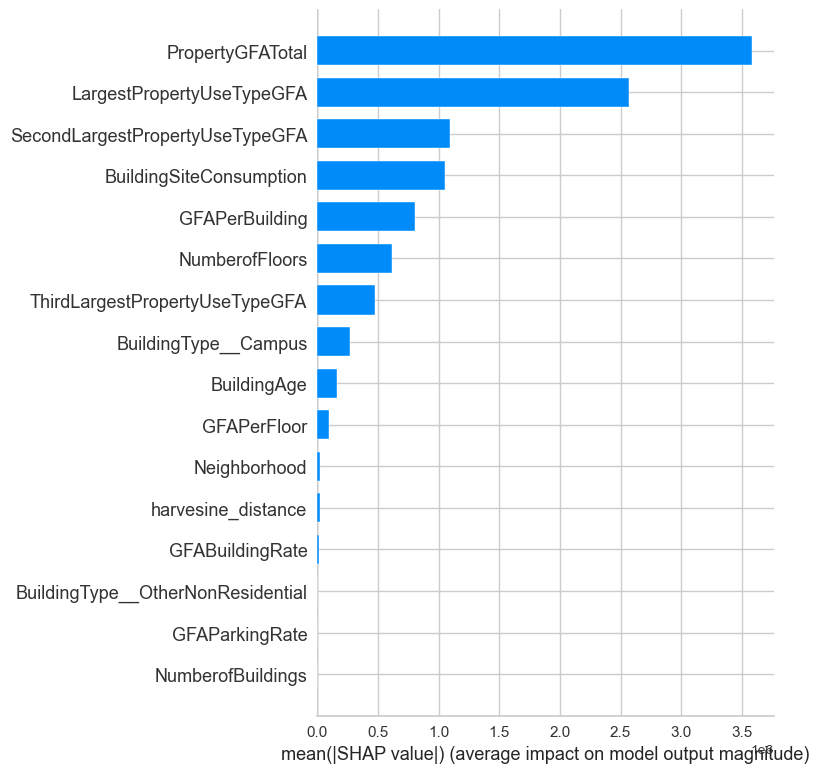

In [98]:
shap.summary_plot(shap_values, features=observations, feature_names=all_features, plot_type='bar')

On remarque que la surface des batîments joue un rôle crucial sur la consommation d'énergie et aussi en 4ème position, on observe que le type de batîment influence aussi la consommation. 

## Force plot

In [99]:
i = 4
shap.force_plot(explainer.expected_value, shap_values, features=observations, feature_names=all_features)

# Évaluation du modèle

In [100]:
from sklearn.model_selection import KFold
from sklearn.metrics import  make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#best_model=RandomForestRegressor(n_estimators=100,bootstrap=False,max_depth=25,max_features='sqrt',min_samples_leaf=2,min_samples_split=2)

def test_model(clf,train,y):
        cv = KFold(n_splits=10, shuffle=True, random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, train, y, cv=cv, scoring=r2)
        scores = r2_val_score
        return scores
the_scores=test_model(rf_model,X_train,Y_train)
rf_model.fit(X_train,Y_train)
y_pred=rf_model.predict(X_test)
validation_score=r2_score(Y_test,y_pred)

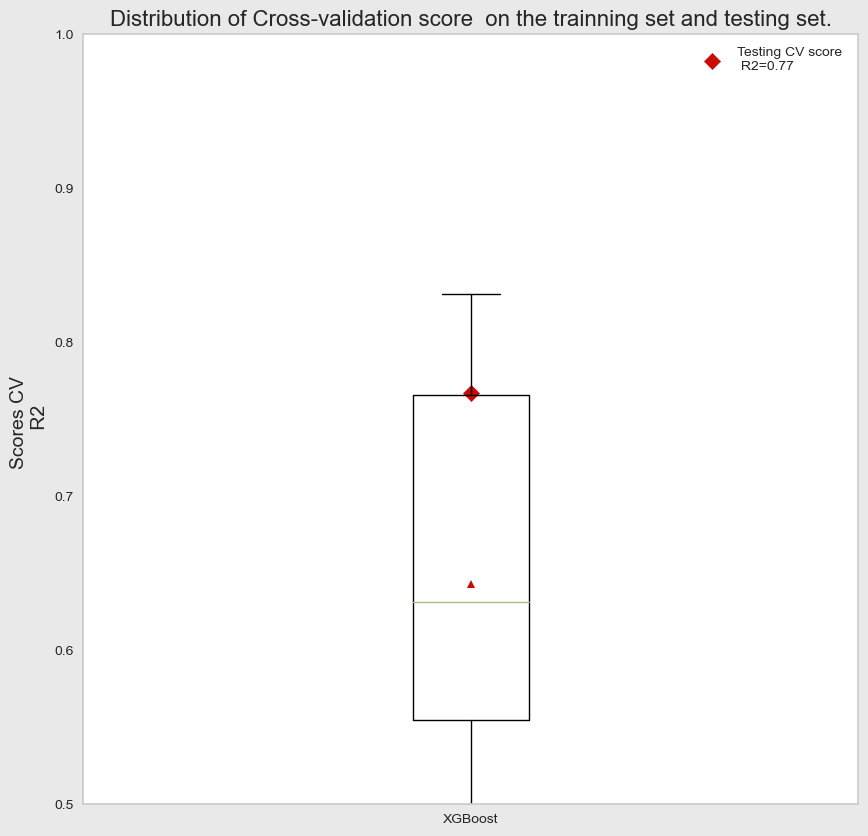

In [101]:
fig=plt.figure(figsize=[10,10])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of Cross-validation score  on the trainning set and testing set.",size=16)
plt.boxplot(the_scores,showmeans=True)
plt.scatter(x=[1],y=[validation_score],s=70,c="r",marker="D",label="Testing CV score \n R2={}".format(round(validation_score,2)))
plt.ylabel("Scores CV \n R2",size=14)
plt.xticks([1],["XGBoost"])
plt.ylim(0.5,1)
plt.xlim(0.5,1.5)
plt.grid()
plt.legend()

In [103]:
y_test=Y_test
df_res=pd.DataFrame({"True values": y_test,"Predictions":y_pred})
df_res["Error"]=abs(df_res["True values"]-df_res["Predictions"])/df_res["True values"]*100
df_res.head()
def color_to_use(num):
    if np.isinf(num):
        return "#cc2900"
    elif num> 80:
        return "#cc2900"
    elif num >50:
        return "#dfa61f"
    elif num>30:
        return "#dddf1f"
    elif num>10:
        return "#7cce2e"
    else:
        return "#13a90d"
df_res["color to use"]=df_res["Error"].apply(color_to_use)
df_res.head()

True values   Predictions       Error color to use
1487  8.957847e+05  3.067181e+06  242.401567      #cc2900
1592  4.581493e+06  1.900082e+07  314.729964      #cc2900
1459  1.632499e+06  3.068295e+06   87.950877      #cc2900
254   4.847999e+07  4.440688e+07    8.401618      #13a90d
1477  1.607972e+06  3.133105e+06   94.848206      #cc2900

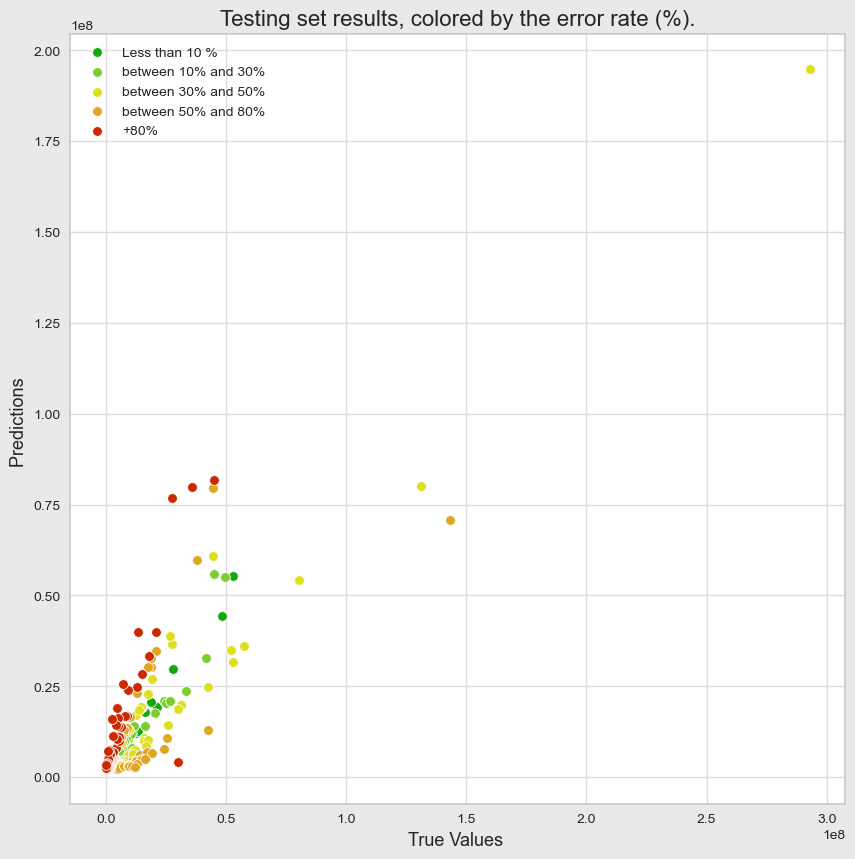

In [104]:
df_res=df_res.sort_values(by = "Error")
dict_lab={"#cc2900":'+80%','#dfa61f':"between 50% and 80%"
          ,'#dddf1f':"between 30% and 50%"
          ,'#7cce2e':"between 10% and 30%"
          ,'#13a90d':"Less than 10 %"}
fig=plt.figure(figsize=[10,10])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Testing set results, colored by the error rate (%).",size=16)
for c in df_res["color to use"].unique():
    d=df_res.loc[df_res["color to use"]==c]
    sns.scatterplot(data=d,x="True values",y="Predictions",color=c,label=dict_lab[c])

plt.xlabel('True Values ',size=13)
plt.ylabel('Predictions ',size=13)
plt.grid(color='#dddddd')

In [105]:
def regroup(num):
    if num<50:
        return "- 50"
    elif num<150:
        return "50-150"
    elif num<250:
        return "150-250"
    else:
        return "+250"
df_res["regroup"]=df_res["True values"].apply(regroup)
df_res=df_res.sort_values(by = "True values")

Text(0.5, 0, 'SiteEnergyUse(kBtu)')

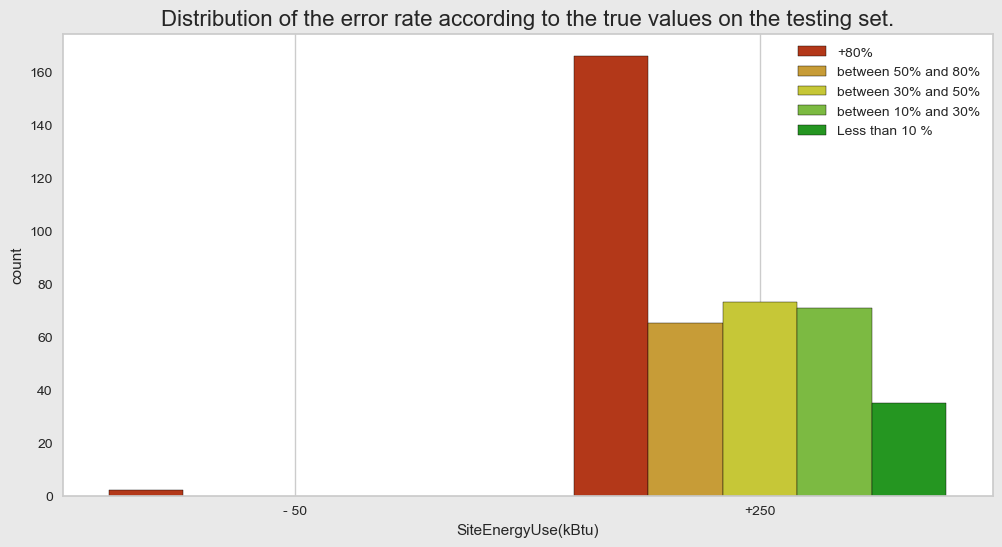

In [106]:
fig=plt.figure(figsize=[12,6])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of the error rate according to the true values on the testing set.",size=16)
sns.countplot(data=df_res,x="regroup",hue="color to use",hue_order=dict_lab.keys(),palette=['#cc2900', '#dfa61f', '#dddf1f', '#7cce2e', '#13a90d'], edgecolor="black")
plt.legend(dict_lab.values())
plt.grid()
plt.xlabel("SiteEnergyUse(kBtu)")

La plupart des batîments ont une consommation plus rapprochée. 

7.2013364421385155


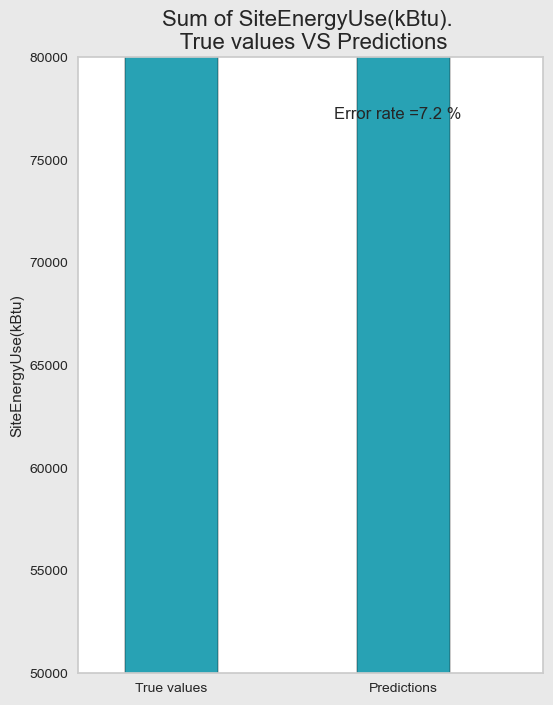

In [107]:
t,p=df_res["True values"].sum(),df_res["Predictions"].sum()
error=abs(t-p)/t*100
print(error)

fig=plt.figure(figsize=[6,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Sum of SiteEnergyUse(kBtu). \n True values VS Predictions",size=16)
plt.bar(x=[1,2],height=[df_res["True values"].sum(),df_res["Predictions"].sum()],color="#28a2b4",width=0.4, edgecolor="black")
plt.xticks([1,2],["True values","Predictions"])
plt.text(1.7,77000,"Error rate ={} %".format(round(error,1)),size=12)
plt.ylabel("SiteEnergyUse(kBtu)")
plt.ylim(50000,80000)
plt.xlim(0.6,2.6)
plt.grid()

Le modèle a une erreur de 7.2%. 

# Influence Energy Star Score

In [108]:
#Ajout de la variable à nos variables X
energystar_score = data['ENERGYSTARScore']
X['energystar_score'] = energystar_score
#Ajout de la variable dans les variables numérique du preprocessor
numeric_features.append('energystar_score')

In [109]:
#Filtrage des données ayant un Energy Star Score renseigné
X = X[X['energystar_score'].isnull()==False]
Y = Y[Y.index.isin(list(X.index))]

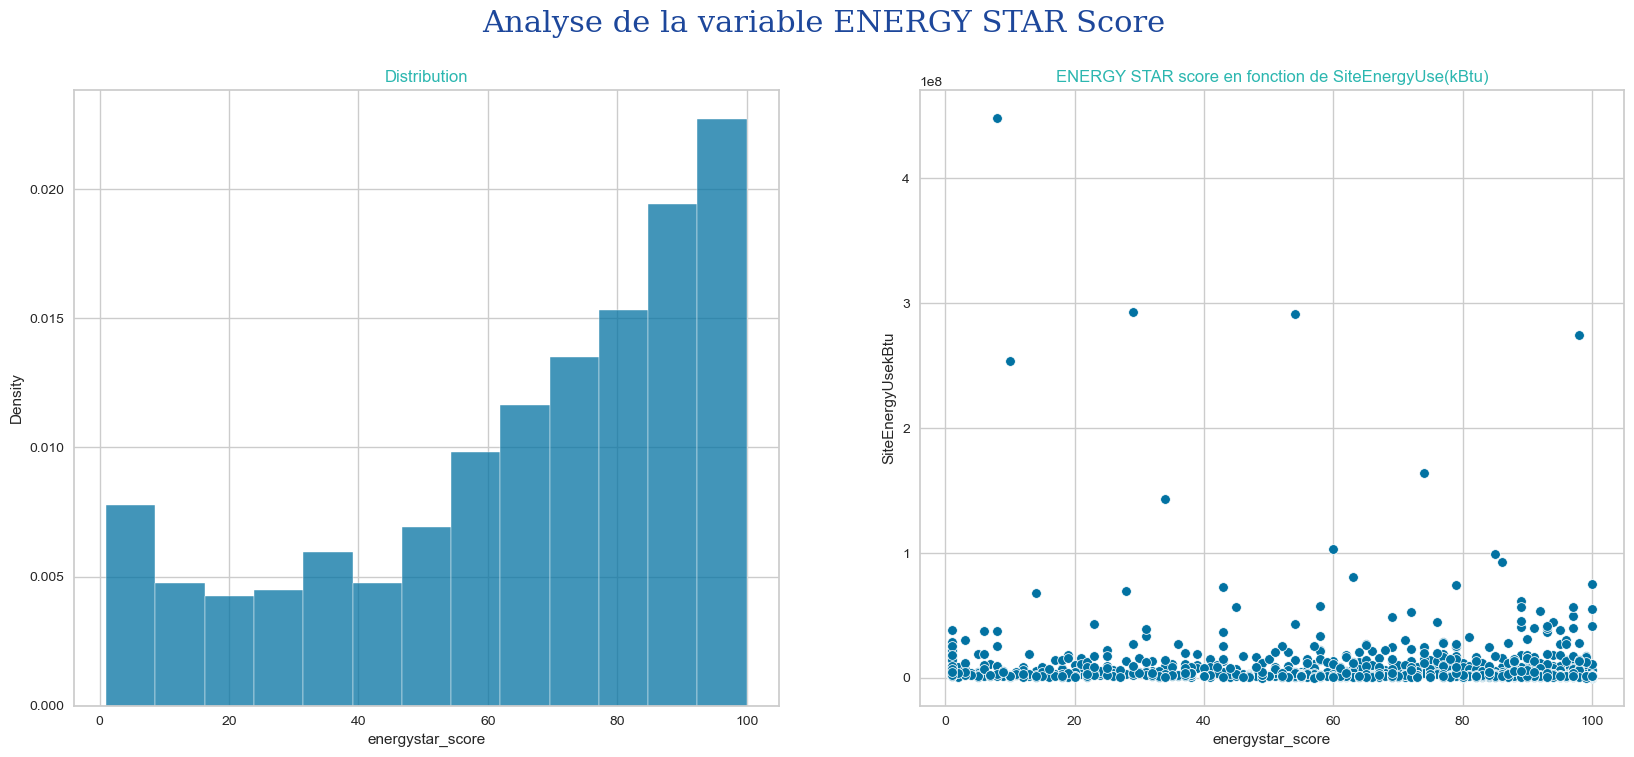

In [110]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=X, x='energystar_score', stat="density", ax=axes[0])
axes[0].set_title("Distribution", color='#2cb7b0')
sns.scatterplot(data=pd.concat([X,Y], axis=1), y='SiteEnergyUsekBtu', x='energystar_score', ax=axes[1])
axes[1].set_title("ENERGY STAR score en fonction de SiteEnergyUse(kBtu)", color='#2cb7b0')
plt.suptitle("Analyse de la variable ENERGY STAR Score", fontdict=font_title, fontsize=22)
plt.show()

In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 864 lignes,
Test: 217 lignes.



## Test des différents modèles avec EnergyStarScore

In [112]:
# Essai modèle linéaire
site_mlr_model_estar = mlr_grid_cv.fit(X_train, Y_train)
lm_estar=site_mlr_model_estar.named_steps['grid_search_mlr'].best_params_
lm_estar

{'regressor__fit_intercept': False, 'regressor__normalize': True}

In [113]:
linear_model_estar= Pipeline([("preprocessor", preprocessor), 
                     ("model", LinearRegression(fit_intercept=True,normalize= True))])

In [114]:
site_mlr_results_estar = model_scores(site_mlr_model_estar, 'grid_search_mlr',linear_model_estar,X_train,Y_train,X_test,Y_test)

Meilleur score de MAE : 4997615.886
Meilleur Score R2 : 0.708
Meilleurs paramètres : {'regressor__fit_intercept': False, 'regressor__normalize': True}
Temps moyen d'entrainement : 4.45s


In [115]:
# Essai modèle ElasticNet
site_eNet_model_estar = eNet_grid_cv.fit(X_train, Y_train)
eNet_estar=site_eNet_model_estar.named_steps['grid_search_enet'].best_params_
eNet_estar

{'regressor__alpha': 1.0,
 'regressor__l1_ratio': 0.9,
 'regressor__max_iter': 100}

In [116]:
eNet_model_estar= Pipeline([("preprocessor", preprocessor), 
                     ("model", ElasticNet(alpha=1.0,l1_ratio=0.9,max_iter=100))])

In [117]:
site_eNet_results_estar = model_scores(site_eNet_model_estar, 'grid_search_enet',eNet_model_estar,X_train,Y_train,X_test,Y_test)

Meilleur score de MAE : 4791140.157
Meilleur Score R2 : 0.696
Meilleurs paramètres : {'regressor__alpha': 1.0, 'regressor__l1_ratio': 0.9, 'regressor__max_iter': 100}
Temps moyen d'entrainement : 9.16s


In [118]:
# Essai Modèle SVR
site_svr_model_estar = svr_grid_cv.fit(X_train, Y_train)
svr_estar=site_svr_model_estar.named_steps['grid_search_svr'].best_params_
svr_estar

{'regressor__C': 0.0001,
 'regressor__epsilon': 2,
 'regressor__loss': 'squared_epsilon_insensitive',
 'regressor__max_iter': 10}

In [119]:
svr_model_estar= Pipeline([("preprocessor", preprocessor), 
                     ("model", LinearSVR(C=0.0001,epsilon=2,loss='squared_epsilon_insensitive',max_iter=10))])

In [120]:
site_svr_results = model_scores(site_svr_model_estar, 'grid_search_svr',svr_model_estar,X_train, Y_train, X_test, Y_test)

Meilleur score de MAE : 6506171.546
Meilleur Score R2 : -0.093
Meilleurs paramètres : {'regressor__C': 0.0001, 'regressor__epsilon': 2, 'regressor__loss': 'squared_epsilon_insensitive', 'regressor__max_iter': 10}
Temps moyen d'entrainement : 17.85s


In [121]:
# Essai Random Forest Regressor
site_rfr_model_estar = rfr_grid_cv.fit(X_train, Y_train)
rf_estar=site_rfr_model_estar.named_steps['grid_search_rfr'].best_params_
rf_estar

{'regressor__bootstrap': False,
 'regressor__max_depth': 7,
 'regressor__max_features': 2,
 'regressor__n_estimators': 100}

In [122]:
rf_model_estar= Pipeline([("preprocessor", preprocessor), 
                     ("model", RandomForestRegressor(bootstrap=False,max_depth=7,max_features=2,n_estimators=100))])

In [123]:
site_rfr_results_estar = model_scores(site_rfr_model_estar, 'grid_search_rfr',rf_model_estar,X_train, Y_train, X_test, Y_test)

Meilleur score de MAE : 3385621.006
Meilleur Score R2 : 0.648
Meilleurs paramètres : {'regressor__bootstrap': False, 'regressor__max_depth': 7, 'regressor__max_features': 2, 'regressor__n_estimators': 100}
Temps moyen d'entrainement : 409.48s


In [124]:
# Essai XGBoost
site_xgb_model_estar = xgb_grid_cv.fit(X_train, Y_train)
xgb_estar=site_xgb_model_estar.named_steps['grid_search_xgb'].best_params_
xgb_estar

{'regressor__gamma': 0.6,
 'regressor__learning_rate': 0.1,
 'regressor__max_depth': 3,
 'regressor__min_child_weight': 5,
 'regressor__n_estimators': 81,
 'regressor__reg_alpha': 0.1,
 'regressor__reg_lambda': 0.65}

In [125]:
xgb_model_estar= Pipeline([("preprocessor", preprocessor), 
                     ("model", XGBRegressor(gamma=0.6,n_estimators=81,max_depth=3,learning_rate=0.1,reg_alpha=0.1,reg_lambda=0.65,min_child_weight=5))])

In [126]:
site_xgb_results_estar = model_scores(site_xgb_model_estar, 'grid_search_xgb',xgb_model_estar,X_train, Y_train, X_test, Y_test)

Meilleur score de MAE : 3095701.171
Meilleur Score R2 : 0.838
Meilleurs paramètres : {'regressor__gamma': 0.6, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__min_child_weight': 5, 'regressor__n_estimators': 81, 'regressor__reg_alpha': 0.1, 'regressor__reg_lambda': 0.65}
Temps moyen d'entrainement : 42.58s


### Prediction Error Plot et Residual Plot

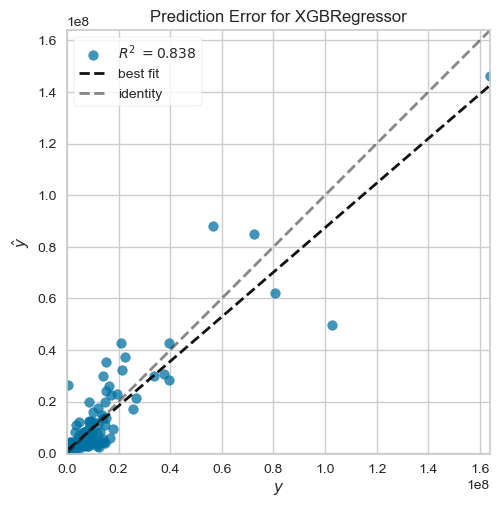

In [127]:
# Instantiate the linear model and visualizer
model = xgb_model_estar
visualizer = prediction_error(model, X_train, Y_train, X_test, Y_test)

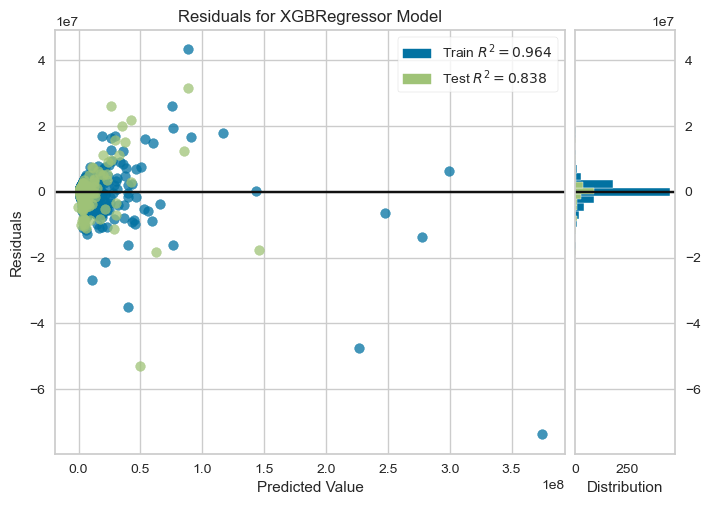

In [128]:
# Create the visualizer, fit, score, and show it
viz = residuals_plot(model, X_train, Y_train, X_test, Y_test)

### Features importance avec EnergyStarScore

In [129]:
# Need to load JS vis in the notebook
shap.initjs() 

In [130]:
explainer = shap.TreeExplainer(xgb_model_estar.named_steps["model"])
observations = xgb_model_estar.named_steps["preprocessor"].transform(X_train.sample(500, random_state=42))
shap_values = explainer.shap_values(observations)

In [131]:
ohe_categories = preprocessor.named_transformers_["one_hot"].categories_
#target_categories=preprocessor.named_transformers_["target"].categories_
ord_categories=preprocessor.named_transformers_["ord"].categories_
new_ohe_features=[f"{col}__{val}" for col, vals in zip(one_hot_features, ohe_categories) for val in vals]
#new_target_features=[f"{col}__{val}" for col, vals in zip(target_features, target_categories) for val in vals]
all_features = numeric_features + new_ohe_features + target_features + ord_features

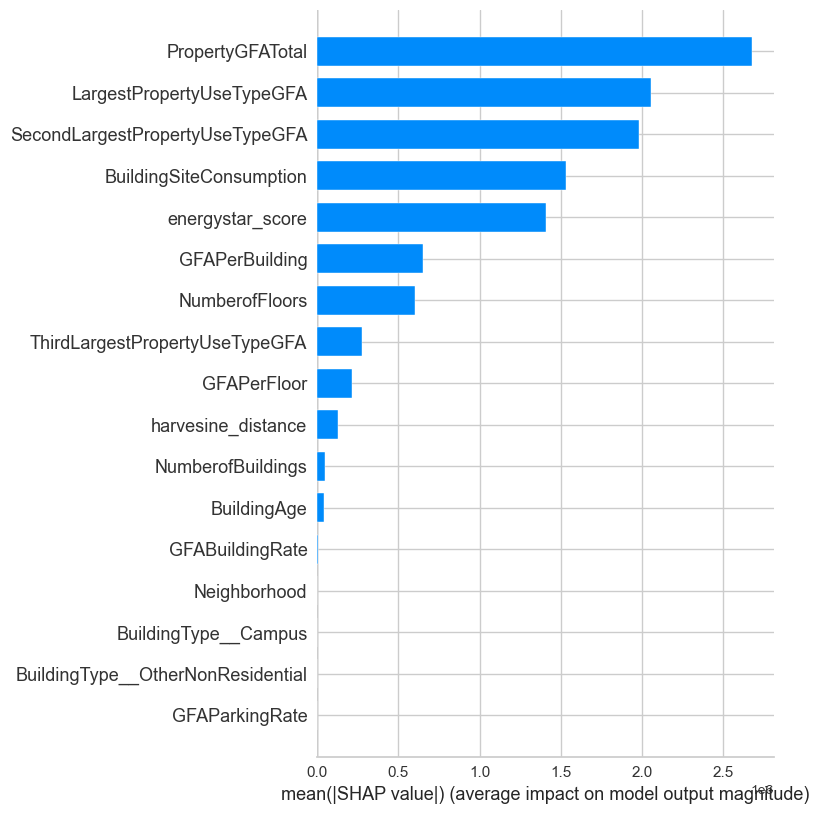

In [132]:
i = 5
shap.summary_plot(shap_values, features=observations, feature_names=all_features, plot_type='bar')

Avec la variable EnergyStarScore, on gagne de 0.1 en R² en comparant les résultats obtenus par le XGBoost regressor et ceux du XGBoost obtenus sans utilisation de la variable. Il faut en effet, évaluer à l'aide des experts si cela vaut le coût d'investir sur l'obtention de cette variable car des modélisations assez correctes sont possibles même sans l'utilisation de la variable. 

De plus, la variable intervient en 5ème position dans le SHAP Features Summary Plot. Donc, cette variable n'est pas la feature dominante. 

# Metrics E Star

In [133]:
def metrics_model(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    diff = y_true - y_pred
    mae = np.mean(abs(diff))
    r2 = 1-(sum(diff**2)/sum((y_true-np.mean(y_true))**2))
    dict_metrics = {"Métrique":["MAE", "R²"], "Résultats":[mae, r2]}
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics

In [134]:
#Modèle avec les meilleurs paramètres pour les émissions de CO2

import time
start_time = time.time()

site_pred = xgb_model_estar.predict(X_test)

print("Temps d'execution de l'agorithme : {:.2} s.".format((time.time() - start_time)))

Temps d'execution de l'agorithme : 0.012 s.


In [135]:
#Calcul des métriques pour les émissions de CO2
sitemetrics = metrics_model(Y_test,site_pred)
sitemetrics

Métrique     Résultats
0      MAE  3.095701e+06
1       R²  8.378707e-01

In [136]:
site_pred_star = xgb_model_estar.predict(X_test)
#Calcul des métriques pour les émissions de CO2
sitemetricsES = metrics_model(Y_test,site_pred_star)
sitemetrics = sitemetrics.rename(columns={"Résultats" : "Sans ENERGY STAR"})
sitemetrics['Avec ENERGY STAR'] = sitemetricsES['Résultats']
sitemetrics

Métrique  Sans ENERGY STAR  Avec ENERGY STAR
0      MAE      3.095701e+06      3.095701e+06
1       R²      8.378707e-01      8.378707e-01

In [137]:
def plot_pred_true(y_true, y_pred, color=None, title=None):
    X_plot = [y_true.min(), y_true.max()]
    fig = plt.figure(figsize=(12,8))
    plt.scatter(y_true, y_pred, color=color, alpha=.6)
    plt.plot(X_plot, X_plot, color='r')
    plt.xlabel("Valeurs réélles")
    plt.ylabel("Valeurs prédites")
    plt.title("Valeurs prédites VS valeurs réélles | Variable {}".format(title), 
              fontdict=font_title, fontsize=18)
    plt.show()

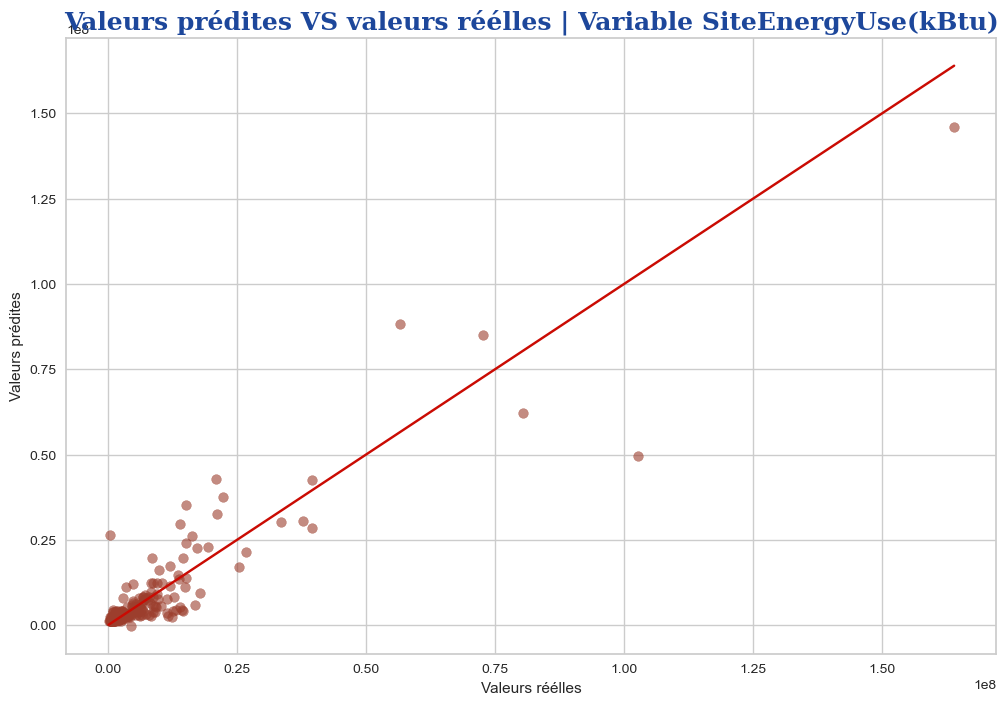

In [138]:
#Affichage des valeurs prédites vs valeurs réélles pour émissions de CO2
plot_pred_true(Y_test,site_pred_star, color="#9C3E2D", title="SiteEnergyUse(kBtu)")

# Essais non utilisés - Results with ordinal encoding and RFR

In [144]:
param_rfr = {'regressor__max_features' : ['sqrt', 'log2'],
             'regressor__max_depth': [5, 15, 25, 50],
             'regressor__min_samples_split': [2, 5, 10],
             'regressor__bootstrap' : [True, False],
             'regressor__min_samples_leaf': [1,2,5,10]}

rfr_grid_cv_ord = Pipeline([
    ('ord_preprocessor', ord_preprocessor),
    ('grid_search_rfr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=RandomForestRegressor(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_rfr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [145]:
#Entrainement sur les 2 variables à expliquer :
GHG_rfr_model_ord = rfr_grid_cv_ord.fit(X_train, Y_train)
GHG_rfr_results_ord = model_scores(GHG_rfr_model_ord, 'grid_search_rfr')

Meilleur score MAE : -118.268
Meilleur Score R2 : 0.349
Meilleurs paramètres : {'regressor__bootstrap': False, 'regressor__max_depth': 50, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2}
Temps moyen d'entrainement : 508.36s


# Plots

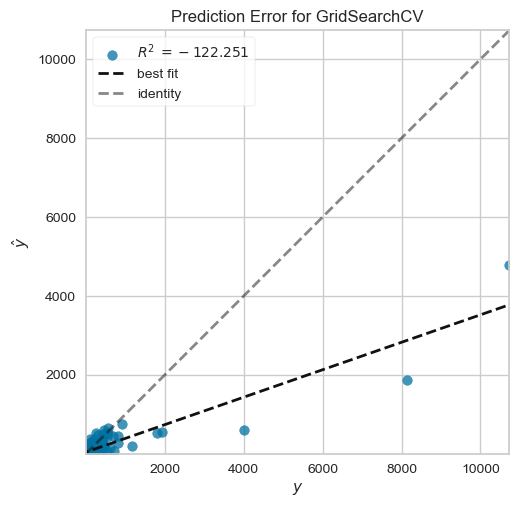

In [146]:
# Instantiate the linear model and visualizer
model = GHG_rfr_model_ord
visualizer = prediction_error(model, X_train, Y_train, X_test, Y_test)

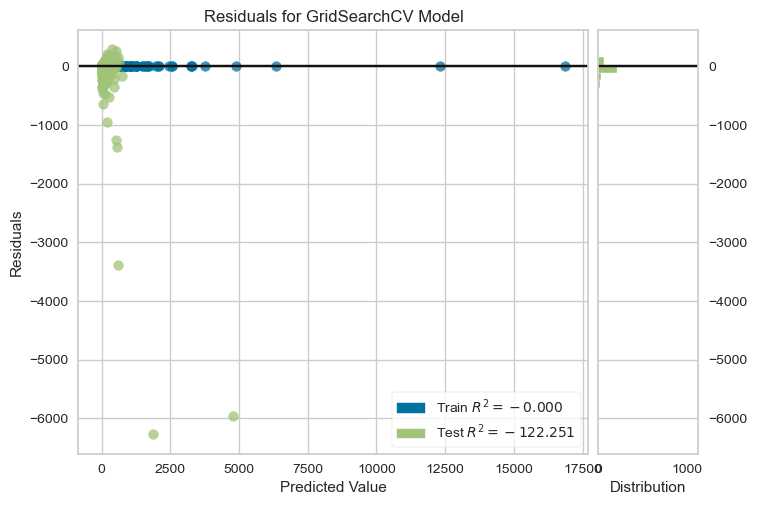

In [147]:

# Create the visualizer, fit, score, and show it
viz = residuals_plot(model, X_train, Y_train, X_test, Y_test)

# Features importance

In [149]:
rf_ord=GHG_rfr_model_ord.named_steps['grid_search_rfr'].best_params_
rf_ord

{'regressor__bootstrap': False,
 'regressor__max_depth': 50,
 'regressor__max_features': 'sqrt',
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 2}

In [150]:
# accéder valeurs du dictionnaire
rf_model_ord= Pipeline([("ord_preprocessor", ord_preprocessor), 
                     ("model", RandomForestRegressor(n_estimators=1000,bootstrap=False,max_depth=50,max_features='sqrt',min_samples_leaf=1,min_samples_split=2))])

In [151]:
import eli5
rf_model_ord.fit(X_train, Y_train)
eli5.show_weights(rf_model_ord.named_steps["model"])

In [152]:
all_features = numeric_features + ord_features

In [154]:
i = 4
eli5.show_prediction(rf_model_ord.named_steps["model"], 
                     rf_model_ord.named_steps["ord_preprocessor"].transform(X_test)[i],
                     feature_names=all_features, show_feature_values=True)

In [155]:
import shap
# Need to load JS vis in the notebook
shap.initjs() 

In [156]:
explainer = shap.TreeExplainer(rf_model_ord.named_steps["model"])

In [157]:
observations = rf_model_ord.named_steps["ord_preprocessor"].transform(X_train.sample(1000, random_state=42))
shap_values = explainer.shap_values(observations)

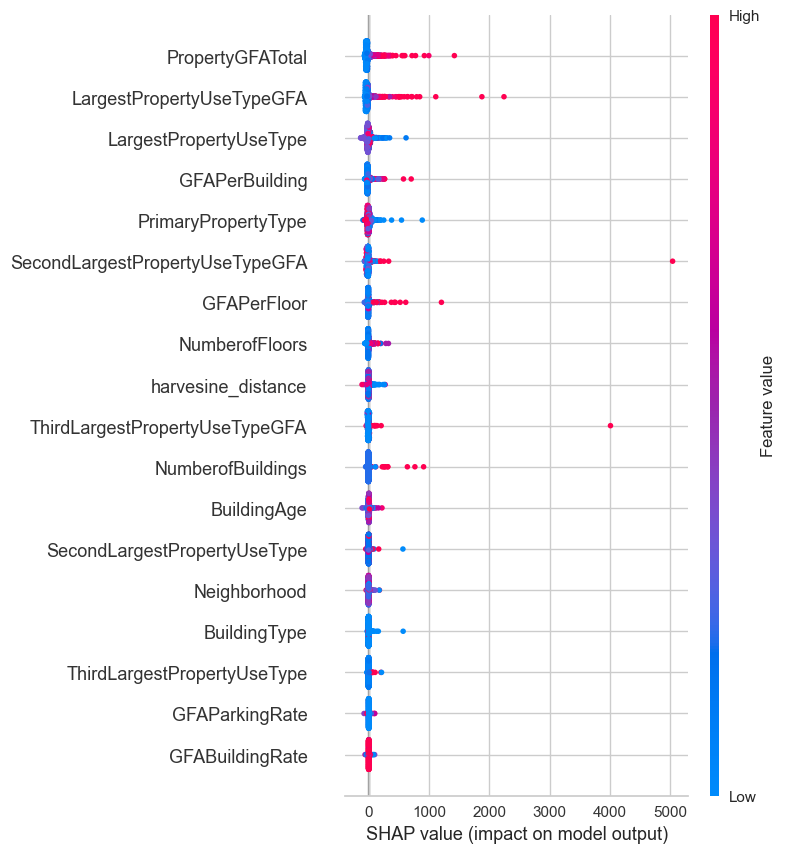

In [158]:
i = 0
shap.summary_plot(shap_values, features=observations, feature_names=all_features)

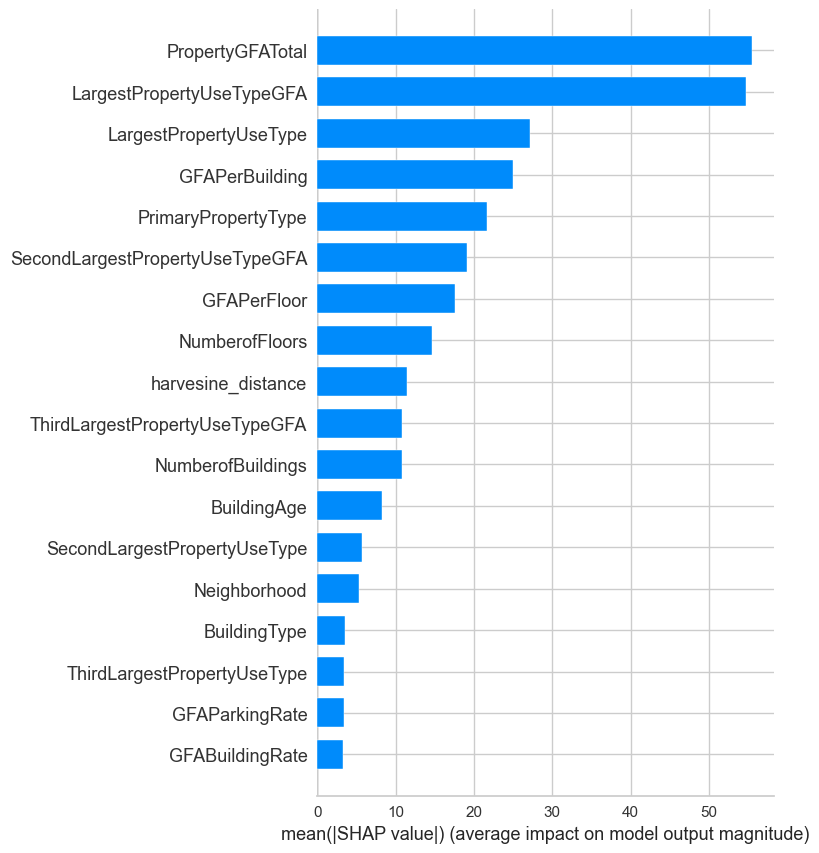

In [177]:
shap.summary_plot(shap_values, features=observations, feature_names=all_features, plot_type='bar')